### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.
https://github.com/crialorob/Alonso_Robles_Cristina_DA201_Assignment

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import datetime

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [4]:
# Determine the sum of missing values in the 'ad' DataFrame.
ad['actual_duration'].isnull().sum()

0

There are invalid/erroneous values in the 'actual_duration' column, identified as'Unknown / Data Quality'.

Python does not identify them as missing values, however I will take a look at the scale of these erroneous values for my awareness and better understanding of the quality of the data.

In [5]:
# Filter the 'ad' DataFrame according to invalid values.
# There are invalid values in the 'actual_duration' column, identified as 'Unknown / Data Quality'.
ad[ad['actual_duration'].str.contains('Unknown / Data Quality')]

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
8,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,02-Dec-21,Unknown / Data Quality,1391
17,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,03-Dec-21,Unknown / Data Quality,1237
24,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,04-Dec-21,Unknown / Data Quality,41
34,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,06-Dec-21,Unknown / Data Quality,1502
...,...,...,...,...,...,...,...,...
137758,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,25-Jun-22,Unknown / Data Quality,60
137765,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,27-Jun-22,Unknown / Data Quality,2616
137772,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,28-Jun-22,Unknown / Data Quality,2815
137779,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,29-Jun-22,Unknown / Data Quality,2256


#### 20,161 (14.6%) rows from the ad DataFrame  were identified as 'Unknown / Data Quality' as the actual duration of the appointment.

In [6]:
# Determine the metadata of the data set.
print(ad.columns)
print(ad.shape)
print(ad.dtypes)
ad.info()

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_co

In [7]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [8]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [9]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [10]:
# Determine the sum of missing values.
ar['appointment_status'].isnull().sum()
ar['hcp_type'].isnull().sum()
ar['time_between_book_and_appointment'].isnull().sum()

0

There are invalid/erroneous values in the 'appointment_status' and in the 'hcp_type' columns, identified as 'Unknown'. There are also invalid values in the 'time_between_book_and_appointment' column, identified as 'Unknown / Data Quality'. Python does not identify them as missing values, however I will take a look at the scale of these erroneous values for my awareness and better understanding of the quality of the data.

In [11]:
# Filter the 'ar' DataFrame according to invalid values.
# There are invalid values in the 'appointment_status' column, identified as 'Unknown'. 
ar[ar['appointment_status'].str.contains("Unknown")]

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
124,E54000034,2020-01,Unknown,GP,Face-to-Face,1 Day,264
125,E54000034,2020-01,Unknown,GP,Face-to-Face,15 to 21 Days,706
126,E54000034,2020-01,Unknown,GP,Face-to-Face,2 to 7 Days,682
127,E54000034,2020-01,Unknown,GP,Face-to-Face,22 to 28 Days,702
128,E54000034,2020-01,Unknown,GP,Face-to-Face,8 to 14 Days,682
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


#### 201,324 (33.7%) rows from the ar DataFrame were identified as having an 'Unknown' appointment status.

In [12]:
# Filter the 'ar' DataFrame according to invalid values.
# There are wrong values in the 'hcp_type' column, identified as 'Unknown'. 
ar[ar['hcp_type'].str.contains("Unknown")]

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
58,E54000034,2020-01,Attended,Unknown,Face-to-Face,1 Day,77
59,E54000034,2020-01,Attended,Unknown,Face-to-Face,15 to 21 Days,3
60,E54000034,2020-01,Attended,Unknown,Face-to-Face,2 to 7 Days,80
61,E54000034,2020-01,Attended,Unknown,Face-to-Face,22 to 28 Days,1
62,E54000034,2020-01,Attended,Unknown,Face-to-Face,8 to 14 Days,29
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


#### 129,228 (21.6%) rows from the ar DataFrame were identified as having an 'Unknown' Healthcare Professional Type.

In [13]:
# Filter the 'ar' DataFrame according to invalid values.
# There are invalid values in the 'time_between_book_and_appointment' column, identified as 'Unknown / Data Quality'.
ar[ar['time_between_book_and_appointment'].str.contains('Unknown / Data Quality')]

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
21,E54000034,2020-01,Attended,GP,Telephone,Unknown / Data Quality,2
36,E54000034,2020-01,Attended,Other Practice staff,Face-to-Face,Unknown / Data Quality,8
119,E54000034,2020-01,DNA,Other Practice staff,Unknown,Unknown / Data Quality,2
131,E54000034,2020-01,Unknown,GP,Face-to-Face,Unknown / Data Quality,30
144,E54000034,2020-01,Unknown,GP,Telephone,Unknown / Data Quality,3
...,...,...,...,...,...,...,...
596651,E54000050,2022-06,Attended,GP,Face-to-Face,Unknown / Data Quality,29
596658,E54000050,2022-06,Attended,GP,Home Visit,Unknown / Data Quality,4
596673,E54000050,2022-06,Attended,Other Practice staff,Face-to-Face,Unknown / Data Quality,2
596698,E54000050,2022-06,Attended,Unknown,Face-to-Face,Unknown / Data Quality,1


#### 29,687(4.9%) rows from the ar DataFrame were identified as having an 'Unknown / Data Quality' as the Time Between Book and Appointment.

In [14]:
# Determine the metadata of the ar data set.
# Determine the metadata of the data set.
print(ar.columns)
print(ar.shape)
print(ar.dtypes)
ar.info()

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                          

In [15]:
# Determine the descriptive statistics of the ar data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [16]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [17]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [18]:
# Determine the sum of missing values in the 'ar' DataFrame.
nc['service_setting'].isnull().sum()
nc['context_type'].isnull().sum()
nc['national_category'].isnull().sum()

0

There are invalid values in the 'service_setting' column, identified as 'Unmapped'. There are also invalid values in the 'context_type' and 'national_category' columns, identified as 'Inconsistent Mapping' and 'Unmapped'. Python does not identify them as missing values, however I will take a look at the scale of these erroneous values for my awareness and better understanding of the quality of the data.

In [19]:
# Filter the 'nc' DataFrame according to invalid values.
# There are invalid values in the 'service_setting' column, identified as 'Unmapped'.
nc[nc['service_setting'].str.contains('Unmapped')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
13558,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4387,2021-10
13578,2021-10-19,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4384,2021-10
13902,2021-10-12,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4329,2021-10
14085,2021-08-09,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4298,2021-08
14137,2021-09-20,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4290,2021-09
...,...,...,...,...,...,...,...,...
817319,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817340,2022-05-21,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817360,2022-06-11,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06
817368,2022-06-18,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06


#### 27,419(3.4%) rows from the nc DataFrame were identified as having an 'Unmapped'as the Service Setting of the Appointment.

In [20]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'context_type' column, identified as 'Unmapped'.
nc[nc['context_type'].str.contains('Unmapped')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
13558,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4387,2021-10
13578,2021-10-19,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4384,2021-10
13902,2021-10-12,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4329,2021-10
14085,2021-08-09,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4298,2021-08
14137,2021-09-20,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4290,2021-09
...,...,...,...,...,...,...,...,...
817319,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817340,2022-05-21,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817360,2022-06-11,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06
817368,2022-06-18,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06


#### 27,419 (3.4%) rows from the nc DataFrame were identified as having an 'Unmapped'as the Context Type of the Appointment. These coincide with the number of rows that have an unmapped Service Setting too.

In [21]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'context_type' column, identified as 'Inconsistent Mapping'.
nc[nc['context_type'].str.contains('Inconsistent Mapping')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
6444,2021-11-15,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6206,2021-11
6449,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6205,2021-10
6548,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,6156,2021-10
6578,2021-10-04,E54000030,NHS South East London ICB - 72Q,General Practice,Inconsistent Mapping,Inconsistent Mapping,6138,2021-10
6599,2021-11-08,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6129,2021-11
...,...,...,...,...,...,...,...,...
817112,2022-01-03,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817130,2022-01-15,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817259,2022-03-26,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-03
817320,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-05


#### 89,494 (10.9%) rows from the nc DataFrame were identified as having an 'Unmapped'as the Context Type of the Appointment.

In [22]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'national_category' column, identified as 'Inconsistent Mapping'.
nc[nc['national_category'].str.contains('Inconsistent Mapping')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
6444,2021-11-15,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6206,2021-11
6449,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6205,2021-10
6548,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,6156,2021-10
6578,2021-10-04,E54000030,NHS South East London ICB - 72Q,General Practice,Inconsistent Mapping,Inconsistent Mapping,6138,2021-10
6599,2021-11-08,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6129,2021-11
...,...,...,...,...,...,...,...,...
817112,2022-01-03,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817130,2022-01-15,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817259,2022-03-26,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-03
817320,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-05


#### 89,494 (10.9%) rows from the nc DataFrame were identified as having an 'Inconsistent Mapping'as the National Category of the Appointment. These coincide with the number of rows that have an unmapped Context Type too.

In [23]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'national_category' column, identified as 'Unmapped'.
nc[nc['national_category'].str.contains('Unmapped')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
13558,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4387,2021-10
13578,2021-10-19,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4384,2021-10
13902,2021-10-12,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4329,2021-10
14085,2021-08-09,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4298,2021-08
14137,2021-09-20,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4290,2021-09
...,...,...,...,...,...,...,...,...
817319,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817340,2022-05-21,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817360,2022-06-11,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06
817368,2022-06-18,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06


#### 27,419 (3.4%) rows from the nc DataFrame were identified as having an 'Unmapped'National Category of the Appointment. These coincide with the number of rows that have an unmapped Service Setting and unmapped Context Type too.

#### It might be worth further investigating these issues in the future and identifying the ICB and Sub ICB Locations linked to these mapping errors. For the purpose of this analysis, I will continue to work with the entire data sets that contain these mapping errors to give insights to the stakeholders on the scale of the issue.

In [24]:
# Determine the metadata of the nc data set.
print(nc.columns)
print(nc.shape)
print(nc.dtypes)
nc.info()

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 no

In [25]:
# Determine the descriptive statistics of the nc data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [26]:
# Determine the number of locations.
# Get Unique Count of Locations from the 'ad' DataFrame. 
# I checked the count of Locations in the other 2 data sets and it coincides.
count = ad.sub_icb_location_name.unique().size
print("Count of locations : "+ str(count))

Count of locations : 106


**Question 2:** What are the five locations with the highest number of records?



In [27]:
# Determine the top five locations based on record count.
# Sorting the nc data set by 'count_of_appointments' to find the 5 locations with the highest number of records.
nc.sort_values(by=['count_of_appointments'], ascending=False)
nc.head()

# Grouping the nc DataFrame by 'sub_icb_location_name' and counting the number of rows for each location.
locations_count = pd.DataFrame(nc.groupby(['sub_icb_location_name']).count())
locations_count

# Sorting the nc DataFrame by 'icb_ons_code' in descending order. 
# (Any of the columns could be chosen, since all of them have the same count of records).
locations_count.sort_values(['icb_ons_code'],ascending=False)

# Determine the top five locations based on record count.
top_5_locations = locations_count.sort_values(['icb_ons_code'],ascending=False)
top_5_locations.head()

,appointment_date,icb_ons_code,service_setting,context_type,national_category,count_of_appointments,appointment_month
sub_icb_location_name,,,,,,,
NHS North West London ICB - W2U3Z,13007,13007,13007,13007,13007,13007,13007
NHS Kent and Medway ICB - 91Q,12637,12637,12637,12637,12637,12637,12637
NHS Devon ICB - 15N,12526,12526,12526,12526,12526,12526,12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171,12171,12171,12171,12171,12171,12171
NHS North East London ICB - A3A8R,11837,11837,11837,11837,11837,11837,11837


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [28]:
# Determine the number of service settings from the 'nc' DataFrame.
print(len(nc['service_setting'].unique()))

5


In [29]:
# Determine the number of context types from the 'nc' DataFrame.
print(len(nc['context_type'].unique()))

3


In [30]:
# Determine the number of national categories from the 'nc' DataFrame.
print(len(nc['national_category'].unique()))

18


In [31]:
# Determine the number of appointment status.
# Determine the number of appointment statuses from the 'ar' DataFrame.
print(len(ar['appointment_status'].unique()))

3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [32]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(ad.dtypes)
ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [33]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the ar DataFrame and columns to determine the format of the dates.
print(ad.dtypes)

# View the DateFrame.
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [34]:
# Determine the minimum date in the ad DataFrame.
# Use appropriate docstrings.
# Sort column from low to high to determine. 
print(ad['appointment_date'].sort_values())

# Determine min value (statistical method).
print(ad['appointment_date'].min())
ad.head()

0        2021-12-01
68150    2021-12-01
68149    2021-12-01
68148    2021-12-01
68147    2021-12-01
            ...    
27712    2022-06-30
27713    2022-06-30
27714    2022-06-30
120088   2022-06-30
137792   2022-06-30
Name: appointment_date, Length: 137793, dtype: datetime64[ns]
2021-12-01 00:00:00


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [35]:
# Determine the last date of scheduled appointments for the ad DataFrame.
# Determine max value (statistical method).
print(ad['appointment_date'].max())
ad.tail()

2022-06-30 00:00:00


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,1-5 Minutes,1739


In [36]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [37]:
# Change the date format of nc['appointment_month'].
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# View the ar DataFrame and columns to determine the format of the dates.
print(nc.dtypes)

# View the DateFrame.
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05-01
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05-01
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10-01
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10-01
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05-01


In [38]:
# Determine the minimum date in the nc DataFrame.
# Use appropriate docstrings.
# Sort column from low to high to determine. 
print(nc['appointment_date'].sort_values())

# Determine min value (statistical method).
print(nc['appointment_date'].min())

405235   2021-08-01
257948   2021-08-01
756969   2021-08-01
682607   2021-08-01
663057   2021-08-01
            ...    
283818   2022-06-30
284599   2022-06-30
284880   2022-06-30
282796   2022-06-30
817393   2022-06-30
Name: appointment_date, Length: 817394, dtype: datetime64[ns]
2021-08-01 00:00:00


In [39]:
# Determine the maximum date in the nc DataFrame.
# Use appropriate docstrings.
# Determine max value (statistical method).
print(nc['appointment_date'].max())
nc.tail()

2022-06-30 00:00:00


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Social Prescribing Service,1,2022-06-01
817390,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Other,Care Related Encounter,Unplanned Clinical Activity,1,2022-06-01
817391,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Group Consultation and Group Education,1,2022-06-01
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Care Home Visit,1,2022-06-01
817393,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Non-contractual chargeable work,1,2022-06-01


In [40]:
# View the first five rows of appointment_date for the ar DataFrame to determine the date format.
print(ar.dtypes)
ar.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [41]:
# Change the date format of ar['appointment_month'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the ar DataFrame and columns to determine the format of the dates.
print(ar.dtypes)

# View the DateFrame.
ar.head()

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


There are not 'appointment_date' column in the ar DataFrame, hence the day populated under the appointmenth_month column is not correct. 
I will use only the month and the year to confirm the minimum and maximum dates in the ar DataFrame.

In [42]:
# Determine the minimum date in the ar DataFrame.
# Use appropriate docstrings.
# Sort column from low to high to determine. 
print(ar['appointment_month'].sort_values())

# Determine min value (statistical method).
print(ar['appointment_month'].min())

0        2020-01-01
134299   2020-01-01
134300   2020-01-01
134301   2020-01-01
134302   2020-01-01
            ...    
491399   2022-06-01
491398   2022-06-01
491397   2022-06-01
491406   2022-06-01
596820   2022-06-01
Name: appointment_month, Length: 596821, dtype: datetime64[ns]
2020-01-01 00:00:00


In [43]:
# Determine the maximum date in the ar DataFrame.
# Use appropriate docstrings.
# Determine max value (statistical method).
print(ar['appointment_month'].max())
ar.tail()

2022-06-01 00:00:00


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06-01,Unknown,Unknown,Unknown,Same Day,10


Before I can give answers to the following questions, since these questions are not specific to any DataFrame, I assume that these questions refer to the three DataFrames as a whole, so I will merge the three DataFrames.

To be able to merge the three DataFrames, we should have comparable inputs in terms of 'count of apppointmets' aggregated to monthly counts, and zero duplicate values.

Before I merge the three DataFrames, I will create a subset of each DataFrame so that I can include a new column of total_monthly_appointments.

Date of appointment (appointment_date): The date the appointment was made for by the patient.

Month of appointment (appointment_month): The month in which the appointment is.

Based on the above notes from the metadata, I would use only the appointment_month column from the nc DataFrame, since this column reflects the month in which the appointment is. However, when I search for duplicates, Ptyhon will identify duplicates when the appointment_date is not included in the DataFrame, and I do not feel confident removing any duplicates from the nc DataFrame. So, I will include the appointment_date column.

In [44]:
# Create a subset of the nc DataFrame.
# Selecting few columns.
nc_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['icb_ons_code','sub_icb_location_name', 'service_setting', 'context_type','national_category','count_of_appointments', 'appointment_date','appointment_month'])

# Print the DataFrame.
nc_subset.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [45]:
# Searching for duplicates values in the nc_subset DataFrame before merging the DataFrames.
# No duplicates were found in the ad DataFrame.
nc_subset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
817389    False
817390    False
817391    False
817392    False
817393    False
Length: 817394, dtype: bool

In [46]:
# View the nc_subset DataFrame and columns to determine the format of the dates.
print(nc_subset.dtypes)

# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc_subset.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [47]:
# Change the date format of the 'appointment_month'.
nc_subset['appointment_month'] = pd.to_datetime(nc_subset['appointment_month'])

# View the nc_subset DataFrame and columns to determine the format of the dates.
print(nc_subset.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object


In [48]:
# Aggregating the 'count of appointments' of the nc_subset DataFrame to total monthly appointments.
t_m_appt_nc_subset = pd.DataFrame(nc_subset.groupby(['icb_ons_code', 'sub_icb_location_name' ,'service_setting', 'context_type', 'national_category','appointment_month']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
t_m_appt_nc_subset.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,appointment_month,total_monthly_appointments
16317,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,2022-03-01,331564
16313,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,2021-11-01,321731
15192,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,2022-03-01,312659
16319,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,2022-05-01,309072
16312,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,2021-10-01,307932
...,...,...,...,...,...,...,...
3569,E54000010,NHS Staffordshire and Stoke-on-Trent ICB - 04Y,Other,Care Related Encounter,General Consultation Acute,2022-04-01,1
3570,E54000010,NHS Staffordshire and Stoke-on-Trent ICB - 04Y,Other,Care Related Encounter,General Consultation Acute,2022-05-01,1
3572,E54000010,NHS Staffordshire and Stoke-on-Trent ICB - 04Y,Other,Care Related Encounter,General Consultation Routine,2021-09-01,1
27116,E54000048,NHS Lancashire and South Cumbria ICB - 01K,Extended Access Provision,Inconsistent Mapping,Inconsistent Mapping,2021-09-01,1


I will do the same process with the ar DataFrame and finally I will merge the ad_subset DataFrame.

In [49]:
# Create a subset of the ar DataFrame.
# Selecting few columns.
ar_subset = pd.read_excel('appointments_regional.xlsx', 
                            usecols=['icb_ons_code', 'appointment_status', 'hcp_type','appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments', 'appointment_month'])

# Print the DataFrame.
ar_subset.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000027,2020-01,Attended,GP,Face-to-Face,Same Day,211265
1,E54000029,2020-01,Attended,GP,Face-to-Face,Same Day,203378
2,E54000027,2020-06,Attended,GP,Telephone,Same Day,191019
3,E54000029,2020-06,Attended,GP,Telephone,Same Day,186344
4,E54000027,2020-02,Attended,GP,Face-to-Face,Same Day,185930


In [50]:
# Searching for duplicates values in the ar_subset DataFrame before merging the DataFrames.
# Duplicates were found.
ar_subset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
596816    False
596817     True
596818    False
596819     True
596820     True
Length: 596821, dtype: bool

In [51]:
# De-duplicate the ar DataFrame using drop_duplicates().
# I decided to remove the 21,604 raws that were found to be duplicated in the ar DataFrame.
ar_subset = ar_subset.drop_duplicates()
ar_subset.shape

(575217, 7)

In [52]:
# View the ar_subset DataFrame and columns to determine the format of the dates.
print(ar_subset.dtypes)

# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
ar_subset.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000027,2020-01,Attended,GP,Face-to-Face,Same Day,211265
1,E54000029,2020-01,Attended,GP,Face-to-Face,Same Day,203378
2,E54000027,2020-06,Attended,GP,Telephone,Same Day,191019
3,E54000029,2020-06,Attended,GP,Telephone,Same Day,186344
4,E54000027,2020-02,Attended,GP,Face-to-Face,Same Day,185930


In [53]:
# Change the date format of the 'appointment_month'.
ar_subset['appointment_month'] = pd.to_datetime(ar_subset['appointment_month'])

# View the ar DataFrame and columns to determine the format of the dates.
print(ar_subset.dtypes)

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object


In [54]:
# Aggregating the 'count of appointments' of the ar_subset DataFrame to total monthly appointments.
t_m_appt_ar_subset = pd.DataFrame(ar_subset.groupby(['icb_ons_code','appointment_status' ,'hcp_type', 'appointment_mode', 'time_between_book_and_appointment', 'appointment_month']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
t_m_appt_ar_subset.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,appointment_month,total_monthly_appointments
229332,E54000054,Attended,GP,Face-to-Face,Same Day,2020-01-01,272700
198263,E54000050,Attended,GP,Face-to-Face,Same Day,2020-01-01,267122
180,E54000008,Attended,GP,Face-to-Face,Same Day,2020-01-01,266805
252220,E54000057,Attended,GP,Face-to-Face,Same Day,2020-01-01,252933
671,E54000008,Attended,GP,Telephone,Same Day,2021-03-01,238889
...,...,...,...,...,...,...,...
176207,E54000042,Unknown,Unknown,Home Visit,22 to 28 Days,2020-09-01,1
176208,E54000042,Unknown,Unknown,Home Visit,22 to 28 Days,2020-10-01,1
234403,E54000054,Unknown,GP,Home Visit,22 to 28 Days,2021-03-01,1
176211,E54000042,Unknown,Unknown,Home Visit,22 to 28 Days,2021-07-01,1


In [55]:
# Aggregating the 'count of appointments' of the ar_subset DataFrame to total monthly appointments.
t_m_appt_ar_subset = pd.DataFrame(ar_subset.groupby(['icb_ons_code','appointment_status' ,'hcp_type', 'appointment_mode', 'time_between_book_and_appointment']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
t_m_appt_ar_subset.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,total_monthly_appointments
22,E54000008,Attended,GP,Telephone,Same Day,5642218
8773,E54000050,Attended,GP,Face-to-Face,Same Day,5550545
8789,E54000050,Attended,GP,Telephone,Same Day,5525539
11045,E54000057,Attended,GP,Telephone,Same Day,5447113
10094,E54000054,Attended,GP,Telephone,Same Day,4606137
...,...,...,...,...,...,...
11874,E54000059,Unknown,GP,Unknown,Same Day,1
9821,E54000053,Attended,Unknown,Face-to-Face,Unknown / Data Quality,1
6406,E54000037,Unknown,Unknown,Video/Online,15 to 21 Days,1
1488,E54000015,Unknown,GP,Unknown,22 to 28 Days,1


In [56]:
# Aggregating the 'count of appointments' of the nc_subset DataFrame to total monthly appointments and removing the appointment_month column.
t_m_appt_nc_subset = pd.DataFrame(nc_subset.groupby(['icb_ons_code', 'sub_icb_location_name' ,'service_setting', 'context_type', 'national_category']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
t_m_appt_nc_subset.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,total_monthly_appointments
1696,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,3208001
1585,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,3022547
1860,E54000032,NHS Kent and Medway ICB - 91Q,General Practice,Care Related Encounter,General Consultation Routine,2848799
1753,E54000030,NHS South East London ICB - 72Q,General Practice,Care Related Encounter,General Consultation Routine,2812022
1804,E54000031,NHS South West London ICB - 36L,General Practice,Care Related Encounter,General Consultation Routine,2793764
...,...,...,...,...,...,...
3741,E54000054,NHS West Yorkshire ICB - 03R,Extended Access Provision,Care Related Encounter,Non-contractual chargeable work,1
3344,E54000051,NHS Humber and North Yorkshire ICB - 03H,Primary Care Network,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,1
928,E54000019,NHS Herefordshire and Worcestershire ICB - 18C,General Practice,Care Related Encounter,Group Consultation and Group Education,1
66,E54000008,NHS Cheshire and Merseyside ICB - 01T,General Practice,Care Related Encounter,Care Home Visit,1


In [57]:
# Merging the nc_subset and the ar_subset DataFrames first.
total_m_appt_nc_ar = pd.merge(t_m_appt_nc_subset, t_m_appt_ar_subset, how='inner', on ='icb_ons_code')

# View the new DataFrame.
total_m_appt_nc_ar.head()

,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,total_monthly_appointments_x,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,total_monthly_appointments_y
0,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,588,Attended,GP,Face-to-Face,1 Day,914438
1,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,588,Attended,GP,Face-to-Face,15 to 21 Days,221742
2,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,588,Attended,GP,Face-to-Face,2 to 7 Days,1364897
3,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,588,Attended,GP,Face-to-Face,22 to 28 Days,125634
4,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,588,Attended,GP,Face-to-Face,8 to 14 Days,523250


In [58]:
# Drop the total 'total_monthly_appointments_x'.
# Otherwise, Python will not allow me to merge the total_m_appt_nc_ar DataFrame with a third column with the same name.
# This column seems to reflect the count of records with the same values in that row, and we have the total monthly appointments number in the 'total_monthly_appointments_y'.
new_total_m_appt_nc_ar = total_m_appt_nc_ar.drop(columns=total_m_appt_nc_ar.columns[5])

# Print the modified dataframe.
new_total_m_appt_nc_ar.head()

,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,total_monthly_appointments_y
0,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,Attended,GP,Face-to-Face,1 Day,914438
1,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,Attended,GP,Face-to-Face,15 to 21 Days,221742
2,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,Attended,GP,Face-to-Face,2 to 7 Days,1364897
3,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,Attended,GP,Face-to-Face,22 to 28 Days,125634
4,E54000008,NHS Cheshire and Merseyside ICB - 01F,Extended Access Provision,Care Related Encounter,General Consultation Acute,Attended,GP,Face-to-Face,8 to 14 Days,523250


The Kernel died when I tried to merge the DataFrames with the appointment_month columns, hence I decided to group the DataFrames without these columns. 

However, after spending a lot of time trying to merge the three DataFrames, I decided to move on with the analysis without the merge, since I was not felling confident with the outcome that I got, since I could not see the appointment_month, which is the month in which the appointment took place.


To give answer to the next questions, I will use the nc DataFrame.

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [60]:
# View the nc DataFrame and columns to determine the format of the dates.
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object


In [62]:
# Filtering the nc DataFrame by the specific dates, from 1 January to 1 June 2022.
nc[(nc['appointment_date'] > '2022-01-01') & (nc['appointment_date'] < '2022-06-01')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05-01
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05-01
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05-01
7,2022-02-28,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16283,2022-02-01
11,2022-03-07,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16116,2022-03-01
...,...,...,...,...,...,...,...,...
817347,2022-05-27,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Care Home Visit,1,2022-05-01
817348,2022-05-27,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,1,2022-05-01
817349,2022-05-28,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Unplanned Clinical Activity,1,2022-05-01
817350,2022-05-28,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,1,2022-05-01


In [63]:
# Sorting the nc DataFrame by ''NHS North West London ICB - W2U3'.
nc_subset.loc[nc_subset['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
40,2022-06-13,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,15324,2022-06-01
47,2022-05-16,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,15056,2022-05-01
51,2022-05-09,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,14964,2022-05-01
56,2022-05-23,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,14907,2022-05-01
58,2022-05-17,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,General Consultation Routine,14904,2022-05-01
...,...,...,...,...,...,...,...,...
816875,2022-06-23,E54000027,NHS North West London ICB - W2U3Z,Other,Care Related Encounter,Structured Medication Review,1,2022-06-01
816876,2022-06-28,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Care Home Visit,1,2022-06-01
816877,2022-06-29,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,1,2022-06-01
816878,2022-06-29,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Structured Medication Review,1,2022-06-01


In [64]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Count the number of records per service_setting.
ss_count = nc.loc[nc['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')].groupby(['service_setting']).count()
ss_count.sort_values(['count_of_appointments'],ascending=False)
most_popular_ss = ss_count.sort_values(['count_of_appointments'],ascending=False)

# View the output.
most_popular_ss

,appointment_date,icb_ons_code,sub_icb_location_name,context_type,national_category,count_of_appointments,appointment_month
service_setting,,,,,,,
General Practice,4609,4609,4609,4609,4609,4609,4609
Other,2858,2858,2858,2858,2858,2858,2858
Primary Care Network,2791,2791,2791,2791,2791,2791,2791
Extended Access Provision,2415,2415,2415,2415,2415,2415,2415
Unmapped,334,334,334,334,334,334,334


**Question 3:** Which month had the highest number of appointments?

In [65]:
# Grouping the nc DataFrame by 'appointment_month' to determine the appointments by month.
# And aggregating the 'count of appointments' to total monthly appointments.
nc = pd.DataFrame(nc.groupby(['appointment_month']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc.sort_values(['total_monthly_appointments'],ascending=False)

,appointment_month,total_monthly_appointments
3,2021-11-01,30405070
2,2021-10-01,30303834
7,2022-03-01,29595038
1,2021-09-01,28522501
9,2022-05-01,27495508
10,2022-06-01,25828078
5,2022-01-01,25635474
6,2022-02-01,25355260
4,2021-12-01,25140776
8,2022-04-01,23913060


**Question 4:** What was the total number of records per month?

In [66]:
# I will use the nc_subset DataFrame.
nc_subset.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05-01
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05-01
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10-01
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10-01
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05-01


In [76]:
# Total number of records per month.
records_count = nc_subset.groupby(['appointment_month'])['sub_icb_location_name'].count().reset_index(name='Count')
records_count.sort_values(by=['Count'], ascending=False)

,appointment_month,Count
7,2022-03-01,82822
3,2021-11-01,77652
9,2022-05-01,77425
1,2021-09-01,74922
10,2022-06-01,74168
2,2021-10-01,74078
4,2021-12-01,72651
5,2022-01-01,71896
6,2022-02-01,71769
8,2022-04-01,70012


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [77]:
# Import the necessary Libraries.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import *

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [78]:
# Read the Excel file.
# Assign a variable.
# Use the pd.read_excel() function.
# Specify the name of the Excel file.
nc = pd.read_excel('national_categories.xlsx')

# Print the top 5 raws of the nc DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [79]:
# Determine shape and data types of the national_category data set.
print(nc.shape)
print(nc.dtypes)

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [115]:
# Aggregate on monthly level and determine the sum of records per month.
import datetime

# Create a subset of the nc DataFrame.

# Selecting few columns.
nc_ss_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['service_setting', 'count_of_appointments', 'appointment_date','appointment_month'])

# Print the DataFrame.
nc_ss_subset.head()

,appointment_date,service_setting,count_of_appointments,appointment_month
0,2022-05-09,General Practice,16590,2022-05
1,2022-05-23,General Practice,16527,2022-05
2,2021-10-11,General Practice,16495,2021-10
3,2021-10-18,General Practice,16492,2021-10
4,2022-05-16,General Practice,16412,2022-05


In [116]:
# Extracting the year from string format date.
nc_ss_subset['year'] = pd.DatetimeIndex(nc_ss_subset['appointment_date']).year
nc_ss_subset.head()

,appointment_date,service_setting,count_of_appointments,appointment_month,year
0,2022-05-09,General Practice,16590,2022-05,2022
1,2022-05-23,General Practice,16527,2022-05,2022
2,2021-10-11,General Practice,16495,2021-10,2021
3,2021-10-18,General Practice,16492,2021-10,2021
4,2022-05-16,General Practice,16412,2022-05,2022


In [117]:
# Creating a new column with month of date field 'appointment_date'.
nc_ss_subset['month'] = pd.DatetimeIndex(nc_ss_subset['appointment_date']).month
nc_ss_subset.head()

,appointment_date,service_setting,count_of_appointments,appointment_month,year,month
0,2022-05-09,General Practice,16590,2022-05,2022,5
1,2022-05-23,General Practice,16527,2022-05,2022,5
2,2021-10-11,General Practice,16495,2021-10,2021,10
3,2021-10-18,General Practice,16492,2021-10,2021,10
4,2022-05-16,General Practice,16412,2022-05,2022,5


In [118]:
# Grouping the nc DataFrame by 'service_setting', 'year' and 'month'.
# And aggregating the 'count of appointments' to monthly counts.

nc_ss_subset= pd.DataFrame(nc_ss_subset.groupby(['service_setting','year','month', 'appointment_month', 'appointment_date',]).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc_ss_subset.sort_values(['total_monthly_appointments'],ascending=False)

# Create a new nc DataFrame that can be used in future weeks.
nc_ss = nc_ss_subset.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
nc_ss

,service_setting,year,month,appointment_month,appointment_date,total_monthly_appointments
440,General Practice,2021,11,2021-11,2021-11-15,1355190
433,General Practice,2021,11,2021-11,2021-11-08,1354605
405,General Practice,2021,10,2021-10,2021-10-11,1352082
412,General Practice,2021,10,2021-10,2021-10-18,1340464
447,General Practice,2021,11,2021-11,2021-11-22,1335782
...,...,...,...,...,...,...
147,Extended Access Provision,2021,12,2021-12,2021-12-26,229
1155,Primary Care Network,2022,1,2022-01,2022-01-01,215
1031,Primary Care Network,2021,8,2021-08,2021-08-30,195
1150,Primary Care Network,2021,12,2021-12,2021-12-27,182


In [119]:
# Aggregate on monthly level and determine the sum of records per month and per service setting.
records_count_nc_ss = nc_ss.groupby(['service_setting'])['appointment_month'].count().reset_index(name='Count')
records_count_nc_ss.sort_values(by=['Count'], ascending=False)

,service_setting,Count
0,Extended Access Provision,334
1,General Practice,334
2,Other,334
3,Primary Care Network,334
4,Unmapped,334


**Service settings:**

Text(0.5, 1.0, 'Monthly Appointments by Service Setting')

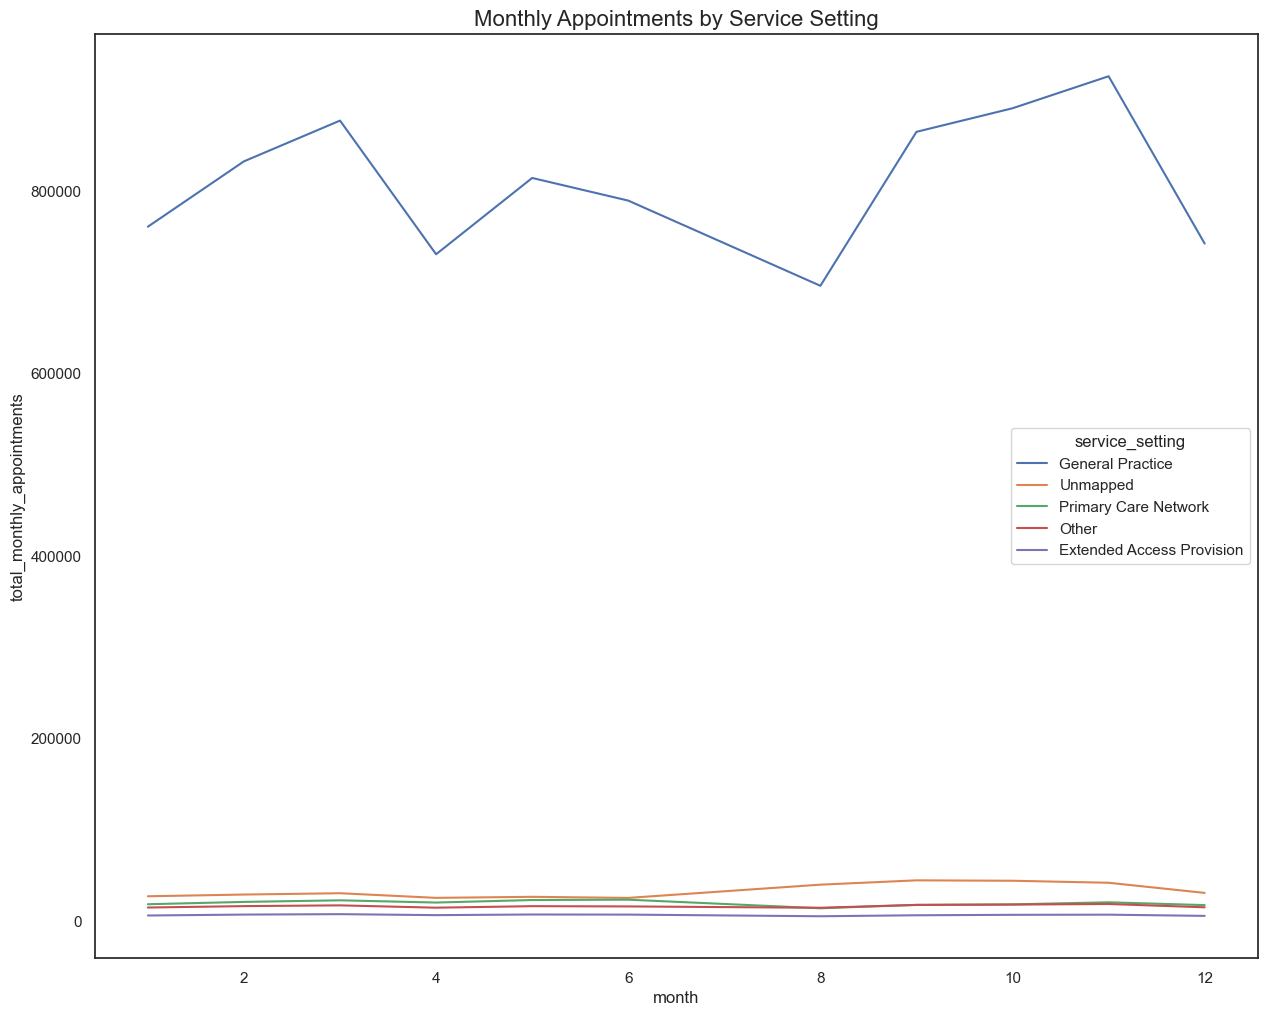

In [120]:
# Plot the appointments over the available date range, and review the service settings for months.

# Create a lineplot.
total_monthly_appointments_ss = nc_ss['total_monthly_appointments']
sns.lineplot(x='month', y='total_monthly_appointments', hue= 'service_setting', 
             data=nc_ss, ci=None).set_title("Monthly Appointments by Service Setting", fontsize=16)

**Context types:**

In [121]:
# Create a subset of the nc DataFrame to look at context type.
# Selecting few columns.

nc_ct_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['context_type', 'count_of_appointments', 'appointment_date','appointment_month'])

# Print the DataFrame.
nc_ct_subset.head()

,appointment_date,context_type,count_of_appointments,appointment_month
0,2022-05-09,Care Related Encounter,16590,2022-05
1,2022-05-23,Care Related Encounter,16527,2022-05
2,2021-10-11,Care Related Encounter,16495,2021-10
3,2021-10-18,Care Related Encounter,16492,2021-10
4,2022-05-16,Care Related Encounter,16412,2022-05


In [122]:
# Extracting the year from string format date.
nc_ct_subset['year'] = pd.DatetimeIndex(nc_ct_subset['appointment_date']).year
nc_ct_subset.head()

,appointment_date,context_type,count_of_appointments,appointment_month,year
0,2022-05-09,Care Related Encounter,16590,2022-05,2022
1,2022-05-23,Care Related Encounter,16527,2022-05,2022
2,2021-10-11,Care Related Encounter,16495,2021-10,2021
3,2021-10-18,Care Related Encounter,16492,2021-10,2021
4,2022-05-16,Care Related Encounter,16412,2022-05,2022


In [123]:
# Creating a new column with month of date field 'appointment_date'.
nc_ct_subset['month'] = pd.DatetimeIndex(nc_ct_subset['appointment_date']).month
nc_ct_subset.head()

,appointment_date,context_type,count_of_appointments,appointment_month,year,month
0,2022-05-09,Care Related Encounter,16590,2022-05,2022,5
1,2022-05-23,Care Related Encounter,16527,2022-05,2022,5
2,2021-10-11,Care Related Encounter,16495,2021-10,2021,10
3,2021-10-18,Care Related Encounter,16492,2021-10,2021,10
4,2022-05-16,Care Related Encounter,16412,2022-05,2022,5


In [124]:
# Aggregate on monthly level and determine the sum of records per month.
# Grouping the nc DataFrame by 'service_setting', 'year' and 'month'.
# And aggregating the 'count of appointments' to monthly counts.

nc_ct_subset= pd.DataFrame(nc_ct_subset.groupby(['context_type','year','month', 'appointment_month', 'appointment_date',]).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc_ct_subset.sort_values(['total_monthly_appointments'],ascending=False)

# Create a new nc DataFrame that can be used in future weeks.
nc_ct = nc_ct_subset.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
nc_ct

,context_type,year,month,appointment_month,appointment_date,total_monthly_appointments
106,Care Related Encounter,2021,11,2021-11,2021-11-15,1279452
99,Care Related Encounter,2021,11,2021-11,2021-11-08,1276802
295,Care Related Encounter,2022,5,2022-05,2022-05-23,1272572
288,Care Related Encounter,2022,5,2022-05,2022-05-16,1271910
71,Care Related Encounter,2021,10,2021-10,2021-10-11,1271753
...,...,...,...,...,...,...
341,Inconsistent Mapping,2021,8,2021-08,2021-08-08,293
348,Inconsistent Mapping,2021,8,2021-08,2021-08-15,277
976,Unmapped,2022,6,2022-06,2022-06-05,243
355,Inconsistent Mapping,2021,8,2021-08,2021-08-22,236


Text(0.5, 1.0, 'Monthly Appointments by Context Type')

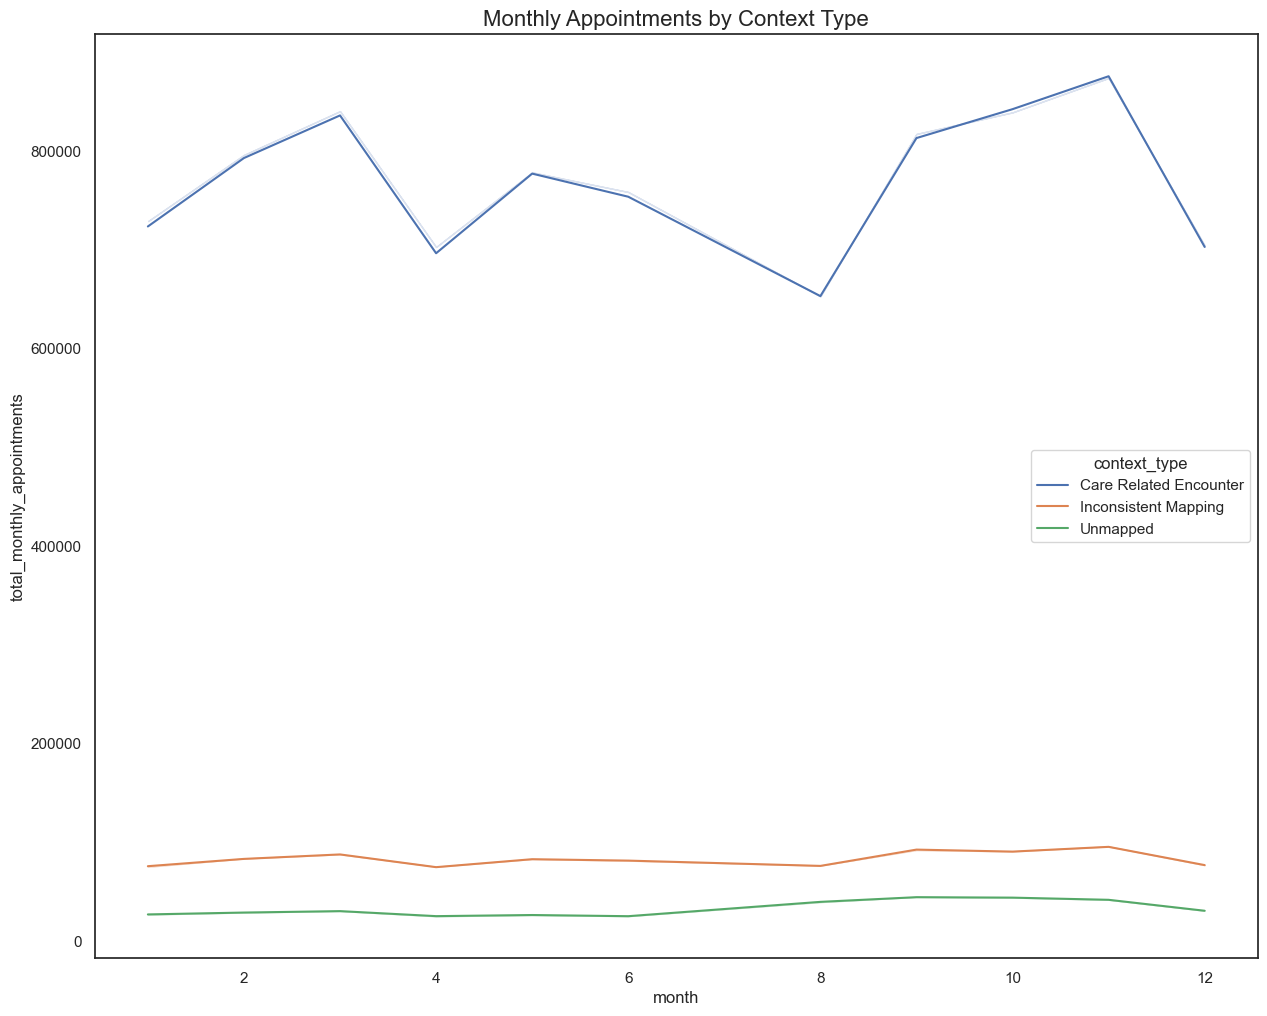

In [125]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
total_monthly_appointments_ct = nc_ct['total_monthly_appointments']
sns.lineplot(x='month', y='total_monthly_appointments', hue= 'context_type', 
             data=nc_ct, ci=0).set_title("Monthly Appointments by Context Type", fontsize=16)

**National categories:**

In [126]:
# Create a subset of the nc DataFrame to look at the national categories.
# Selecting few columns.

nc_nc_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['national_category', 'count_of_appointments', 'appointment_date','appointment_month'])

# Print the DataFrame.
nc_nc_subset.head()

,appointment_date,national_category,count_of_appointments,appointment_month
0,2022-05-09,General Consultation Routine,16590,2022-05
1,2022-05-23,General Consultation Routine,16527,2022-05
2,2021-10-11,General Consultation Routine,16495,2021-10
3,2021-10-18,General Consultation Routine,16492,2021-10
4,2022-05-16,General Consultation Routine,16412,2022-05


In [127]:
# Extracting the year from string format date.
nc_nc_subset['year'] = pd.DatetimeIndex(nc_nc_subset['appointment_date']).year
nc_nc_subset.head()

,appointment_date,national_category,count_of_appointments,appointment_month,year
0,2022-05-09,General Consultation Routine,16590,2022-05,2022
1,2022-05-23,General Consultation Routine,16527,2022-05,2022
2,2021-10-11,General Consultation Routine,16495,2021-10,2021
3,2021-10-18,General Consultation Routine,16492,2021-10,2021
4,2022-05-16,General Consultation Routine,16412,2022-05,2022


In [128]:
# Creating a new column with month of date field 'appointment_date'.
nc_nc_subset['month'] = pd.DatetimeIndex(nc_nc_subset['appointment_date']).month
nc_nc_subset.head()

,appointment_date,national_category,count_of_appointments,appointment_month,year,month
0,2022-05-09,General Consultation Routine,16590,2022-05,2022,5
1,2022-05-23,General Consultation Routine,16527,2022-05,2022,5
2,2021-10-11,General Consultation Routine,16495,2021-10,2021,10
3,2021-10-18,General Consultation Routine,16492,2021-10,2021,10
4,2022-05-16,General Consultation Routine,16412,2022-05,2022,5


In [129]:
# Aggregate on monthly level and determine the sum of records per month.
# Grouping the nc DataFrame by 'national_category', 'year' and 'month'.
# And aggregating the 'count of appointments' to monthly counts.

nc_nc_subset= pd.DataFrame(nc_nc_subset.groupby(['national_category','year','month', 'appointment_month', 'appointment_date',]).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc_nc_subset.sort_values(['total_monthly_appointments'],ascending=False)

# Create a new nc DataFrame that can be used in future weeks.
nc_nc = nc_nc_subset.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
nc_nc

,national_category,year,month,appointment_month,appointment_date,total_monthly_appointments
1616,General Consultation Routine,2022,5,2022-05,2022-05-23,490451
1609,General Consultation Routine,2022,5,2022-05,2022-05-16,488260
1602,General Consultation Routine,2022,5,2022-05,2022-05-09,487037
1637,General Consultation Routine,2022,6,2022-06,2022-06-13,482193
1539,General Consultation Routine,2022,3,2022-03,2022-03-07,480732
...,...,...,...,...,...,...
145,Care Home Needs Assessment & Personalised Care...,2021,12,2021-12,2021-12-26,1
2666,Non-contractual chargeable work,2021,11,2021-11,2021-11-28,1
1893,Home Visit,2021,8,2021-08,2021-08-01,1
1764,Group Consultation and Group Education,2022,1,2022-01,2022-01-03,1


Text(0.5, 1.0, 'Monthly Appointments by National Category')

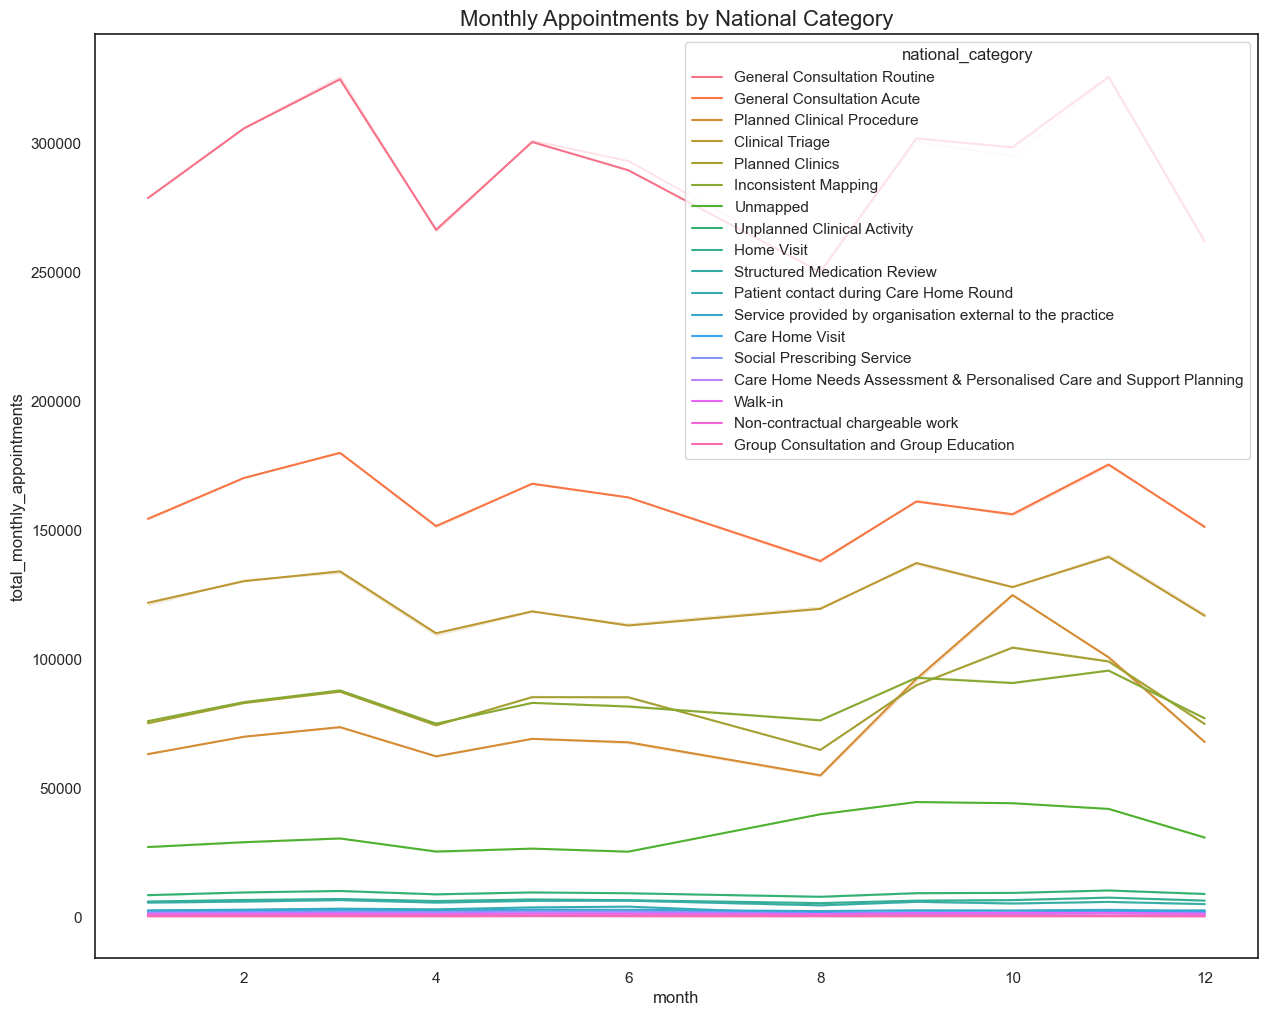

In [131]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
total_monthly_appointments_nc = nc_nc['total_monthly_appointments']
sns.lineplot(x='month', y='total_monthly_appointments', hue= 'national_category', 
             data=nc_nc, ci=0).set_title("Monthly Appointments by National Category", fontsize=16)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [132]:
# View the output.
nc_ss
print(nc_ss.dtypes)
nc_ss

service_setting                       object
year                                   int64
month                                  int64
appointment_month                     object
appointment_date              datetime64[ns]
total_monthly_appointments             int64
dtype: object


,service_setting,year,month,appointment_month,appointment_date,total_monthly_appointments
440,General Practice,2021,11,2021-11,2021-11-15,1355190
433,General Practice,2021,11,2021-11,2021-11-08,1354605
405,General Practice,2021,10,2021-10,2021-10-11,1352082
412,General Practice,2021,10,2021-10,2021-10-18,1340464
447,General Practice,2021,11,2021-11,2021-11-22,1335782
...,...,...,...,...,...,...
147,Extended Access Provision,2021,12,2021-12,2021-12-26,229
1155,Primary Care Network,2022,1,2022-01,2022-01-01,215
1031,Primary Care Network,2021,8,2021-08,2021-08-30,195
1150,Primary Care Network,2021,12,2021-12,2021-12-27,182


Text(0.5, 1.0, 'Summer 2021 - Appointments')

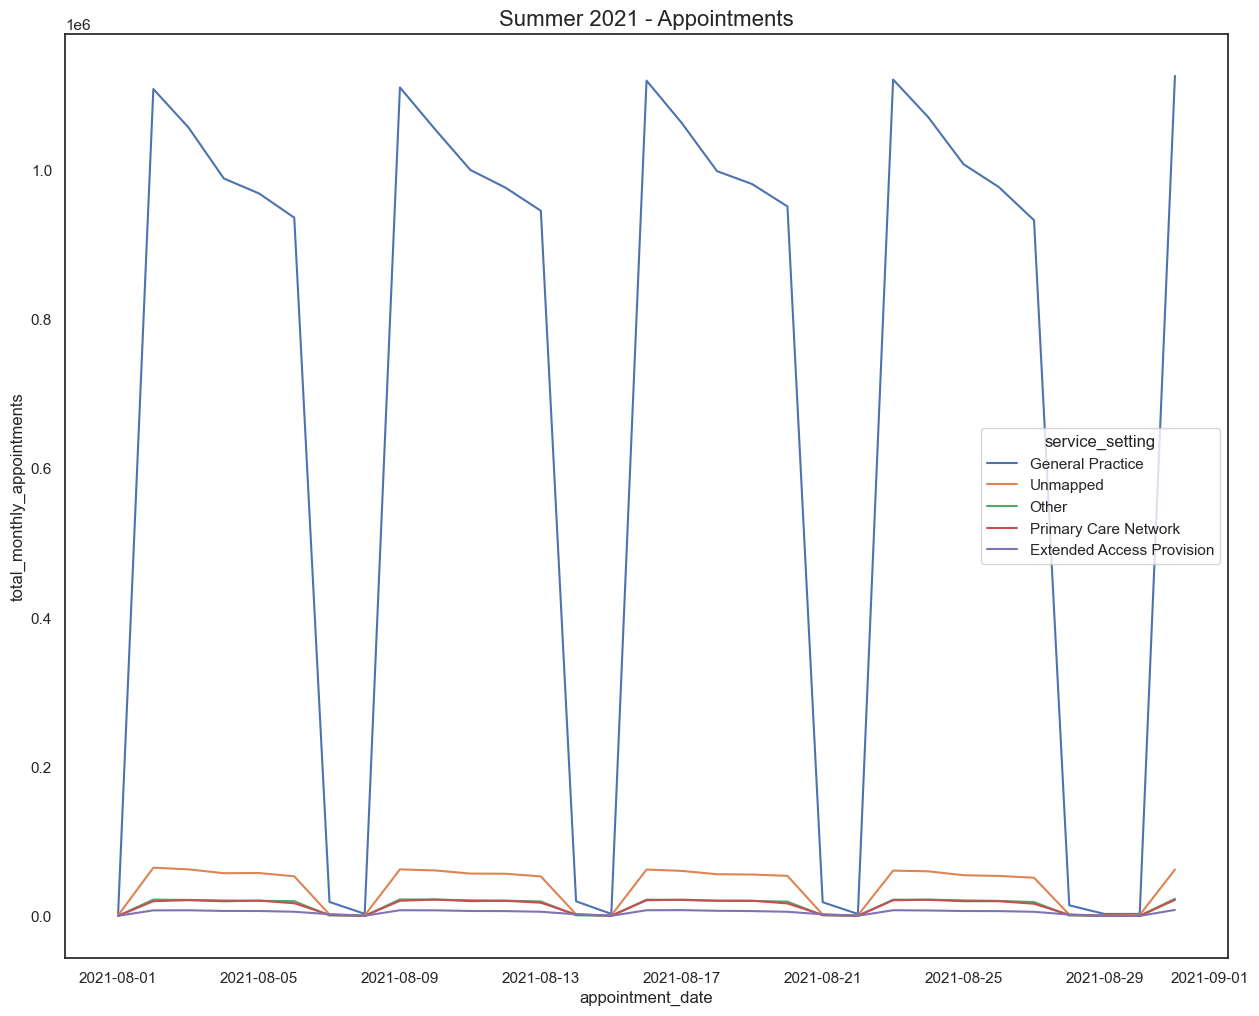

In [139]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
summer = nc_ss.query("appointment_month =='2021-08'")
sns.lineplot(data=summer, x="appointment_date", y="total_monthly_appointments", 
             hue='service_setting', errorbar=('ci', 0)).set_title("Summer 2021 - Appointments", fontsize=16)

**Autumn (October 2021):**

Text(0.5, 1.0, 'Autumn 2021 - Appointments')

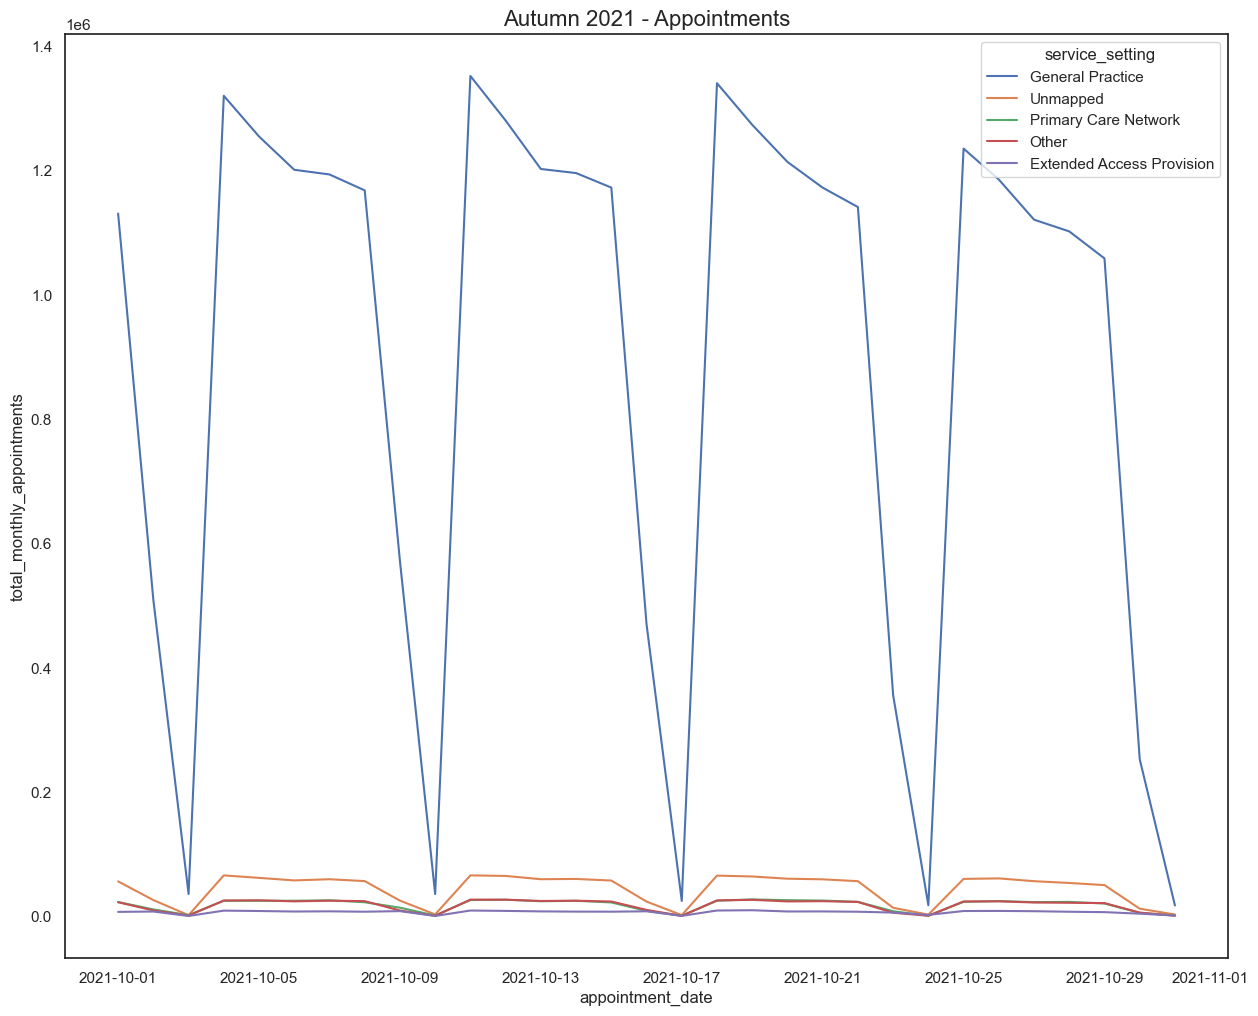

In [140]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
autumn = nc_ss.query("appointment_month =='2021-10'")
sns.lineplot(data=autumn, x="appointment_date", y="total_monthly_appointments", 
             hue= 'service_setting', errorbar=('ci', 0)).set_title("Autumn 2021 - Appointments", fontsize=16)

**Winter (January 2022):**

Text(0.5, 1.0, 'Winter 2022 - Appointments')

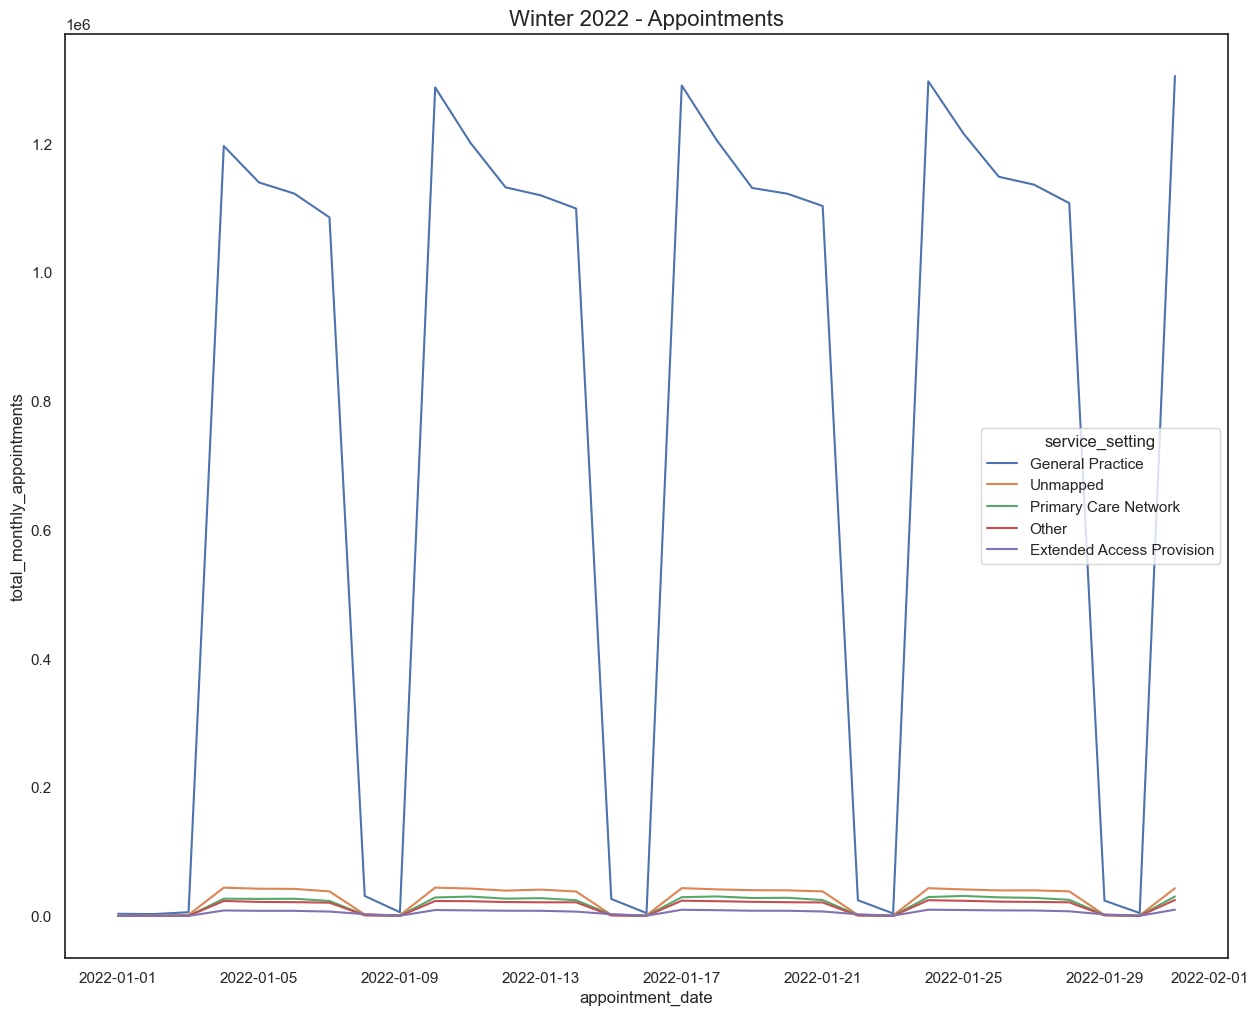

In [142]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
winter = nc_ss.query("appointment_month =='2022-01'")
sns.lineplot(data=winter, x="appointment_date", y="total_monthly_appointments", 
             hue='service_setting', errorbar=('ci', 0)).set_title("Winter 2022 - Appointments", fontsize=16)


**Spring (April 2022):**

Text(0.5, 1.0, 'Spring 2022 - Appointments')

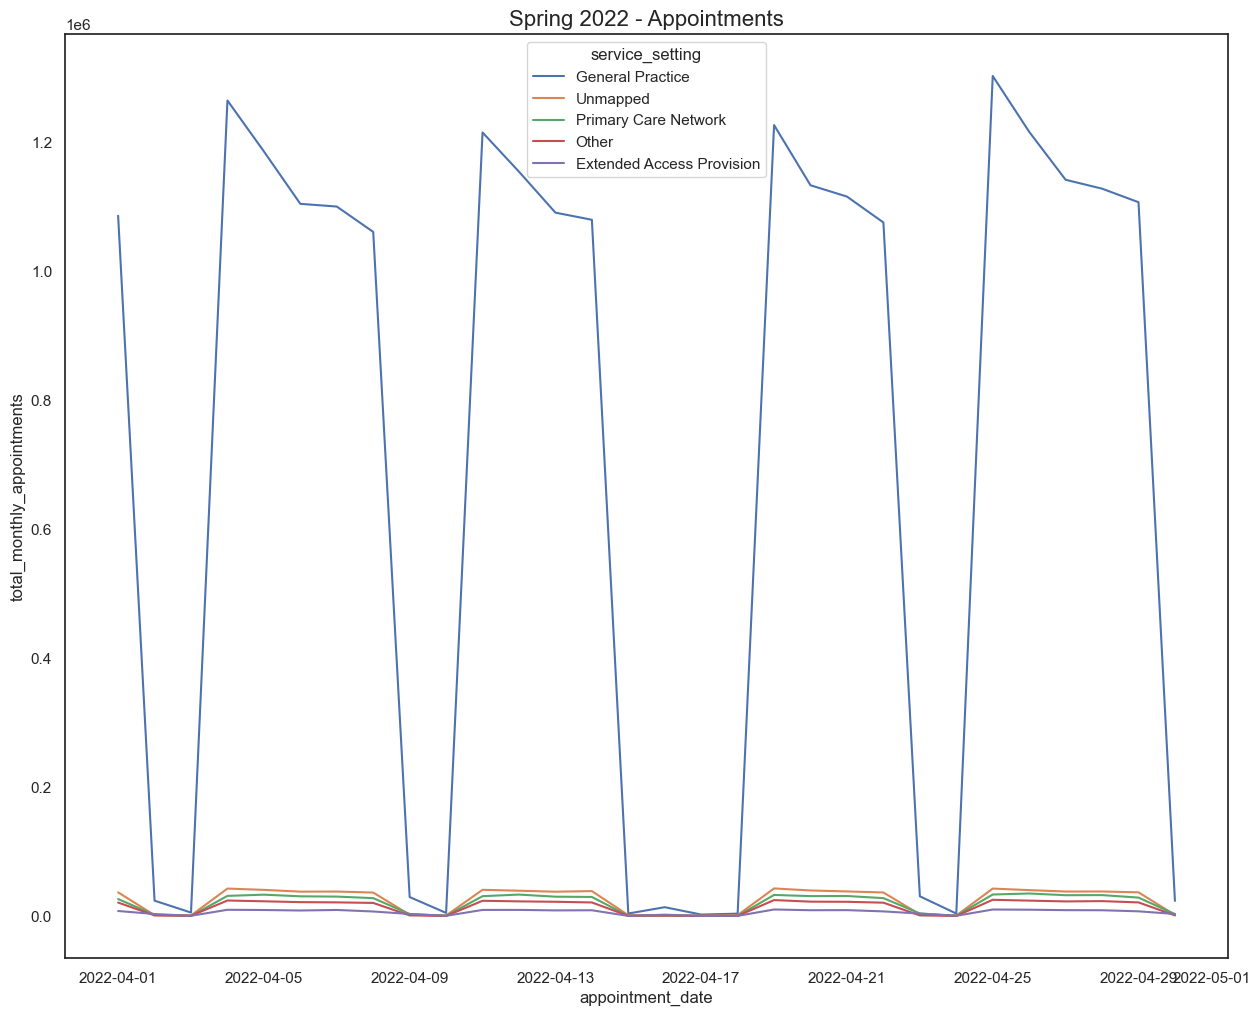

In [143]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
spring = nc_ss.query("appointment_month =='2022-04'")
sns.lineplot(data=spring, x="appointment_date", y="total_monthly_appointments", hue='service_setting', 
             errorbar=('ci', 0)).set_title("Spring 2022 - Appointments", fontsize=16)


# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [1]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [13]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1.570000e+18,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1.570000e+18,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1.570000e+18,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1.570000e+18,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1.570000e+18,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [14]:
# Explore the metadata.
print(tweets.columns)
print(tweets.shape)
print(tweets.dtypes)
tweets.info()

Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')
(1174, 10)
tweet_id                   float64
tweet_full_text             object
tweet_entities              object
tweet_entities_hashtags     object
tweet_metadata              object
tweet_retweet_count          int64
tweet_favorite_count         int64
tweet_favorited               bool
tweet_retweeted               bool
tweet_lang                  object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1174 non-null   float64
 1   tweet_full_text          1174 non-null   object 
 2   tweet_entities           1174 non-null   object 
 3  

In [15]:
# Determine the descriptive statistics of the tweets data set. Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.570000e+18,8.629472,0.37138
std,4.456298e+04,29.784675,2.04470
min,1.570000e+18,0.000000,0.00000
25%,1.570000e+18,0.000000,0.00000
50%,1.570000e+18,1.000000,0.00000
75%,1.570000e+18,3.000000,0.00000
max,1.570000e+18,303.000000,42.00000


In [16]:
# Searching for duplicates values in the tweet DataFrame.
# Duplicates were found.
tweets.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1169    False
1170    False
1171    False
1172    False
1173     True
Length: 1174, dtype: bool

In [17]:
# De-duplicate the tweets DataFrame using drop_duplicates().
# Having a look at the scale of duplicates.
# 205 raws that were found to be duplicated in the tweets DataFrame.
# I saw the duplicates in the Data Frame and I decided to remove them. 
tweets = tweets.drop_duplicates()
tweets.shape

(969, 10)

**Would it be useful to only look at retweeted and favourite tweet messages? Explain your answer.**

I think that sorting these two columns by the highest number of retweets and the most favourite tweets will enable me to identify the most popular tweets by number of retweets and number of times that people marked them as favorites.

Afterwards, we would be able to look at the full text and hashtags used if wanted.

In [20]:
# Sorting the data by tweets that contain the #healthare.
retweets_health_ = tweets.loc[tweets['tweet_full_text'].str.contains('#healthcare')]

# Sorting the data by 'tweet_retweet_count' to find the tweets with the highest number of retweets.
retweets_health_ = tweets.sort_values(by=['tweet_retweet_count'], ascending=False)

# View the output.
retweets_health_.head(10)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
263,1.570000e+18,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': ""Ultima Lions' Den"", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",303,0,False,False,en
330,1.570000e+18,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
27,1.570000e+18,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",207,0,False,False,en
1130,1.570000e+18,RT @imedverse: I.V Drug Calculations Cheat Sheet\n\n@Pharma_Connect @imedverse #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicar…,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [77, 92]}, {'text': 'MedEd', 'indices': [93, 99]}, {'text': 'MedTwitter', 'indices': [100, 111]}, {'text': 'medicine', 'indices': [112, 121]}, {...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical","{'iso_language_code': 'en', 'result_type': 'recent'}",169,0,False,False,en
779,1.570000e+18,RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…,"{'hashtags': [{'text': 'Applications', 'indices': [21, 34]}, {'text': 'AI', 'indices': [38, 41]}, {'text': 'healthcare', 'indices': [45, 56]}, {'text': 'digitalhealth', 'indices': [76, 90]}, {'tex...","#Applications, #AI, #healthcare, #digitalhealth, #Healthtech, #Health, #DataScience, #Bigdata","{'iso_language_code': 'en', 'result_type': 'recent'}",150,0,False,False,en
790,1.570000e+18,RT @Khulood_Almani: #Healthcare #DigitalTransformation Starts with This 6⃣Step Process\n\nv/@uptophealth\n#digitalhealth #AI #Python #DataScie…,"{'hashtags': [{'text': 'Healthcare', 'indices': [20, 31]}, {'text': 'DigitalTransformation', 'indices': [32, 54]}, {'text': 'digitalhealth', 'indices': [103, 117]}, {'text': 'AI', 'indices': [118,...","#Healthcare, #DigitalTransformation, #digitalhealth, #AI, #Python","{'iso_language_code': 'en', 'result_type': 'recent'}",107,0,False,False,en
65,1.570000e+18,"RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Canada’s is teetering. We both dedicate simil…","{'hashtags': [{'text': 'healthcare', 'indices': [54, 65]}], 'symbols': [], 'user_mentions': [{'screen_name': 'SoniaFurstenau', 'name': 'Sonia Furstenau', 'id': 2358617670, 'id_str': '2358617670', ...",#healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",85,0,False,False,en
577,1.570000e+18,RT @imedverse: Features of Lung Diseases\n\n#pulmonary #pulmtwitter #pulmonology #pulmonary #respiratory #internalmedicine #TipsForNewDocs #M…,"{'hashtags': [{'text': 'pulmonary', 'indices': [42, 52]}, {'text': 'pulmtwitter', 'indices': [53, 65]}, {'text': 'pulmonology', 'indices': [66, 78]}, {'text': 'pulmonary', 'indices': [79, 89]}, {'...","#pulmonary, #pulmtwitter, #pulmonology, #pulmonary, #respiratory, #internalmedicine, #TipsForNewDocs","{'iso_language_code': 'en', 'result_type': 'recent'}

In [21]:
# Sorting the data by tweets that contain the #healthare.
fav_tweets_health = tweets.loc[tweets['tweet_full_text'].str.contains('#healthcare')]

# Sorting the data by 'tweet_favorite_count' to find the tweets with the highest number of likes.
fav_tweets_health = tweets.sort_values(by=['tweet_favorite_count'], ascending=False)

# View the output.
fav_tweets_health.head(10)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
1156,1.570000e+18,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",12,42,False,False,en
9,1.570000e+18,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,"{'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', '...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,28,False,False,en
442,1.570000e+18,How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb,"{'hashtags': [{'text': 'comedy', 'indices': [31, 38]}, {'text': 'adulting', 'indices': [39, 48]}, {'text': 'healthcare', 'indices': [49, 60]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'med...","#comedy, #adulting, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",5,20,False,False,en
84,1.570000e+18,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...","{'hashtags': [{'text': 'healthcare', 'indices': [22, 33]}, {'text': 'cdnpoli', 'indices': [270, 278]}], 'symbols': [], 'user_mentions': [], 'urls': []}","#healthcare, #cdnpoli","{'iso_language_code': 'en', 'result_type': 'recent'}",4,18,False,False,en
1122,1.570000e+18,"Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...","{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [64, 79]}, {'text': 'MedEd', 'indices': [80, 86]}, {'text': 'MedTwitter', 'indices': [87, 98]}, {'text': 'medicine', 'indices': [99, 108]}, {'te...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",3,17,False,False,en
119,1.570000e+18,"More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solutions and further system fragmentation...","{'hashtags': [{'text': 'healthcare', 'indices': [26, 37]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/eZkz5brcYT', 'expanded_url': 'https://www.ctvnews.ca/health/canadians...",#healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",4,14,False,False,en
758,1.570000e+18,Looking forward to speaking at #ConV2X on Sep 15! Ping me for a speaker discount if interested! Register at https://t.co/v20ebbXmdO \n\n.@BHTYjournal @hedera @acoerco\n#blockchain #DLT #healthcare...,"{'hashtags': [{'text': 'ConV2X', 'indices': [31, 38]}, {'text': 'blockchain', 'indices': [165, 176]}, {'text': 'DLT', 'indices': [177, 181]}, {'text': 'healthcare', 'indices': [182, 193]}, {'text'...","#ConV2X, #blockchain, #DLT, #healthcare, #innovation","{'iso_language_code': 'en', 'result_type': 'recent'}",3,13,False,False,en
1098,1.570000e+18,@CapricornFMNews We have waiting to hear this kind of news now Sa is getting things correct there is absolutely nothing mahala #HealthCare serv

In [11]:
# Create a new DataFrame containing only the text, selecting only 'tweet_full_text'.
tweets_text = pd.read_csv('tweets.csv', 
                            usecols=['tweet_full_text'])

# Print the first 5 raws of the DataFrame.
tweets_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [12]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = list()
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
# View the output.
top_trending_hashtags = tags
top_trending_hashtags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [154]:
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.
tags = pd.Series(top_trending_hashtags)
print(tags)
tags.head(30)

0            #healthcare
1         #premisehealth
2                #hiring
3            #healthcare
4                🚨#new:🚨
              ...       
3784      #physiotherapy
3785    \n#healthynation
3786         #healthcare
3787      \n#medicalcare
3788            \n#csjmu
Length: 3789, dtype: object


0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [157]:
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.                                 
tags = pd.DataFrame(tweets_text.groupby(['tweet_full_text']).count())

#Display the first 30 records.
tags.head(30)

""
tweet_full_text
"""Did you run after it?"" ""Are you one of the innocents or did you run after it?"" https://t.co/EdDO782Y96\n#HIV #AIDS #Cancer #Stigma #Healthcare #Pharmaceutical #Politics https://t.co/0xADeVcy9g"
"""New Jersey Governor Signs Act Concerning Changes in Control of Health Care Entities"" #NewJersey #HealthCare @Health_Affairs https://t.co/eDa5ouaWJV"
"""One of the #BEST ONLINE GRIEF SUPPORT GROUPS is My Grief Angels"" August 2022 - #grief #support #Group #virtual #zoom #death #loss #bereavement #Online #community #Mentalhealth #health #wellness #healthcare #COVID #NEWS_音楽 #awards2022 #nonprofit #USA https://t.co/mzv5fl0nmO https://t.co/dZOBCcWKOo"
"""To show my support for the @SHNcares ER doctors, nurses &amp; staff who supported my mom after her fall this summer, I bought myself some #LoveScarborough merch to support #healthcare in our Scarborough hospitals. Shoutout to SHN for taking care of my mom!"" @ushashan43 https://t.co/dlPNxd6ViN"
"""True #healthcare reform starts in your kitchen...not in Washington."" #GetFit https://t.co/5V4E92tYAm"
"""[My agent] was extremely through to find the best benefits. Afterwards she explained them to me. She was extremely helpful to me because I am new to Medicare and did not know anything about it"" -Beverly\n\n#medicare #health #healthcare #insurance #medicaremedicaid #turning65 https://t.co/ReM98CImbV"
#AI tools in #healthcare!\n\nInfographic by @ingliguori\n\n#Python #Nodejs #MachineLearning #100daysofmlcode #HTML5 #RStats #Serverless #Flutter #Java #Developer #developers #IoT #javascript #TensorFlow #pythonlearning #technology #security #ArtificialIntelligence #MachineLearning https://t.co/9HkaEDyExa
"#Amazon’s next #healthcare venture may be in #Japan - It’ll partner with pharmacies in 2023, according to a report https://t.co/vbqYYwVPNH"
"#Artificialintelligence will give clinicians better access to more precise medical data for #patients to help identify best possible treatments. #Healthcare's future is increasingly personalized, “always on,” w/diagnostics being remote. @UCDavisHealth\nhttps://t.co/xvcZlCayhF"


In [158]:
# Create a user-defined function using the def keyword.
# Name the function as contains_healthcare.
# Specify the named parameter as (x).
# Specify what the function should do. For example, does the product contain the word matches in their description?. 
# The triple quotation marks (""" """) indicates to Python it is a docstring.
# The second line of code indicates that y is testing the parameter (x.lower()). 
# For example, identify whether the lower case word healthcare is in the function x. 
# Specify the return keyword to execute the function. For example, does the lower case word matches appear in y?.

def contains_healthcare(x):
    """ does the tweet full text contain #healthcare? """
    y = x.lower()
    return "#healthcare" in y

# Print the function by testing various options of the word matches. 
# For example, matches and Matches.
# View the output.
print(contains_healthcare(x="#healthcare"))
print(contains_healthcare(x="#Healthcare"))

True
True


In [159]:
# Use the apply() function.
tags_healthcare = tweets_text["tweet_full_text"].apply(contains_healthcare)

# View the DataFrame.
print(tags_healthcare)

# Filter the DataFrame.
tweets_text[tags_healthcare]
tweets_text[tags_healthcare].shape


0        True
1       False
2        True
3       False
4        True
        ...  
1169    False
1170     True
1171     True
1172     True
1173    False
Name: tweet_full_text, Length: 1174, dtype: bool


(842, 1)

#### A total of 842 hashtags contain the word 'healthcare'. Originally there were 961 unique comments in the tweet_full_text column. Therefore, 87.6% of the tweets contain the word 'healthcare.

In [160]:
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.
tags = pd.Series(top_trending_hashtags)
print(tags)
tags.head()

0            #healthcare
1         #premisehealth
2                #hiring
3            #healthcare
4                🚨#new:🚨
              ...       
3784      #physiotherapy
3785    \n#healthynation
3786         #healthcare
3787      \n#medicalcare
3788            \n#csjmu
Length: 3789, dtype: object


0       #healthcare
1    #premisehealth
2           #hiring
3       #healthcare
4           🚨#new:🚨
dtype: object

In [161]:
# Print the data type.
print(type(tags))

<class 'pandas.core.series.Series'>


In [162]:
# Convert the series to a DataFrame in preparation for visualisation.
# Creating two lists.

import numpy as np

word = ['#healthcare', '#premisehealth', '#hiring', '#healthcare', '🚨#new:🚨', 'look!\n\n#blogs', 
        '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', 
        '#firstcoastcna', '#cnaexam', '#cnaexampreparation','#jacksonville', '#cnatraining', '#nurse', 
        '#nursing', '#nurselife', '#nursepractitioner','#nurseproblems', '#nursingschool','#healthcare', 
        '🚨#new:🚨', '#disparities','@karahartnett\n#healthcare','#alert', '#insurance', '#data', '#healthcare']

count = []

# Creating two series by passing lists.
word_series = pd.Series(word)
count_series = pd.Series(dtype=np.int64)

# Creating a dictionary by passing Series objects as values.
frame = {'Word': word_series,
         'Count': count_series}

# Creating DataFrame by passing Dictionary.
top_trending_hashtags = pd.DataFrame(frame)
 
# Printing elements of Dataframe
print(top_trending_hashtags)

                          Word  Count
0                  #healthcare    NaN
1               #premisehealth    NaN
2                      #hiring    NaN
3                  #healthcare    NaN
4                      🚨#new:🚨    NaN
5              look!\n\n#blogs    NaN
6       #digitaltransformation    NaN
7               #cybersecurity    NaN
8                  #accounting    NaN
9                     #finance    NaN
10                 #healthcare    NaN
11              #firstcoastcna    NaN
12                    #cnaexam    NaN
13         #cnaexampreparation    NaN
14               #jacksonville    NaN
15                #cnatraining    NaN
16                      #nurse    NaN
17                    #nursing    NaN
18                  #nurselife    NaN
19          #nursepractitioner    NaN
20              #nurseproblems    NaN
21              #nursingschool    NaN
22                 #healthcare    NaN
23                     🚨#new:🚨    NaN
24                #disparities    NaN
25  @karahar

In [163]:
# Count the number of hashtags per tweet_full_text.
top_trending_hashtags = top_trending_hashtags.groupby(['Word']).count()

top_trending_hashtags.sort_values(['Count'],ascending=False)
top_trending_hashtags = top_trending_hashtags.sort_values(['Count'],ascending=False)

# View the output.
top_trending_hashtags

,Count
Word,
#accounting,0
#insurance,0
look!\n\n#blogs,0
@karahartnett\n#healthcare,0
#premisehealth,0
#nursingschool,0
#nursing,0
#nurseproblems,0
#nursepractitioner,0


In [164]:
# Convert the series to a DataFrame in preparation for visualisation.
# Creating two lists.

import numpy as np

word = [tags]

count = []

# Creating two series by passing lists.
word_series = pd.Series(word)
count_series = pd.Series(dtype=np.int64)

# Creating a dictionary by passing Series objects as values.
frame = {'Word': tags,
         'Count': count_series}

# Creating DataFrame by passing Dictionary.
top_trending_hashtags = pd.DataFrame(frame)
 
# Printing elements of Dataframe
print(top_trending_hashtags)

                  Word  Count
0          #healthcare    NaN
1       #premisehealth    NaN
2              #hiring    NaN
3          #healthcare    NaN
4              🚨#new:🚨    NaN
...                ...    ...
3784    #physiotherapy    NaN
3785  \n#healthynation    NaN
3786       #healthcare    NaN
3787    \n#medicalcare    NaN
3788          \n#csjmu    NaN

[3789 rows x 2 columns]


In [165]:
# Convert the series to a DataFrame in preparation for visualisation.
# Creating two lists.

import numpy as np

word = [tags]

# Creating two series by passing lists.
word_series = pd.Series(word)

# Creating a dictionary by passing Series objects as values.
frame = {'Word': tags}

# Creating DataFrame by passing Dictionary.
top_trending_hashtags = pd.DataFrame(frame)
 
# Printing elements of Dataframe
print(top_trending_hashtags)


                  Word
0          #healthcare
1       #premisehealth
2              #hiring
3          #healthcare
4              🚨#new:🚨
...                ...
3784    #physiotherapy
3785  \n#healthynation
3786       #healthcare
3787    \n#medicalcare
3788          \n#csjmu

[3789 rows x 1 columns]


In [166]:
# Count the number of unique hashtags.
top_trending_unique_hashtags = top_trending_hashtags.groupby(['Word']).value_counts().reset_index(name='Count')
top_trending_unique_hashtags.sort_values(by=['Count'], ascending=False)

,Word,Count
632,#healthcare,657
625,#health,61
817,#job,35
1350,#strategy,30
1099,#pharmaceutical,28
...,...,...
654,#healthcaregency,1
653,#healthcarecommercialin…,1
652,#healthcarecommercialintelligence,1
651,#healthcarecareers,1


In [167]:
# Ensure the count data type is an integer for data analysis.
print(top_trending_unique_hashtags.dtypes)

Word     object
Count     int64
dtype: object


In [168]:
# Display records where the count is larger than 10.
top_trending_unique_hashtags = top_trending_unique_hashtags[top_trending_unique_hashtags['Count'] >10]

# Sort the data by asceinding order.
top_trending_unique_hashtags = top_trending_unique_hashtags.sort_values(['Count'],ascending=False)
top_trending_unique_hashtags


,Word,Count
632,#healthcare,657
625,#health,61
817,#job,35
1350,#strategy,30
1099,#pharmaceutical,28
131,#ai,25
1098,#pharma,25
880,#marketing,25
354,#competitiveintelligence,24
211,#biotech,24


In [169]:
# Import Matplotlib, Seaborn, and Pandas.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import *

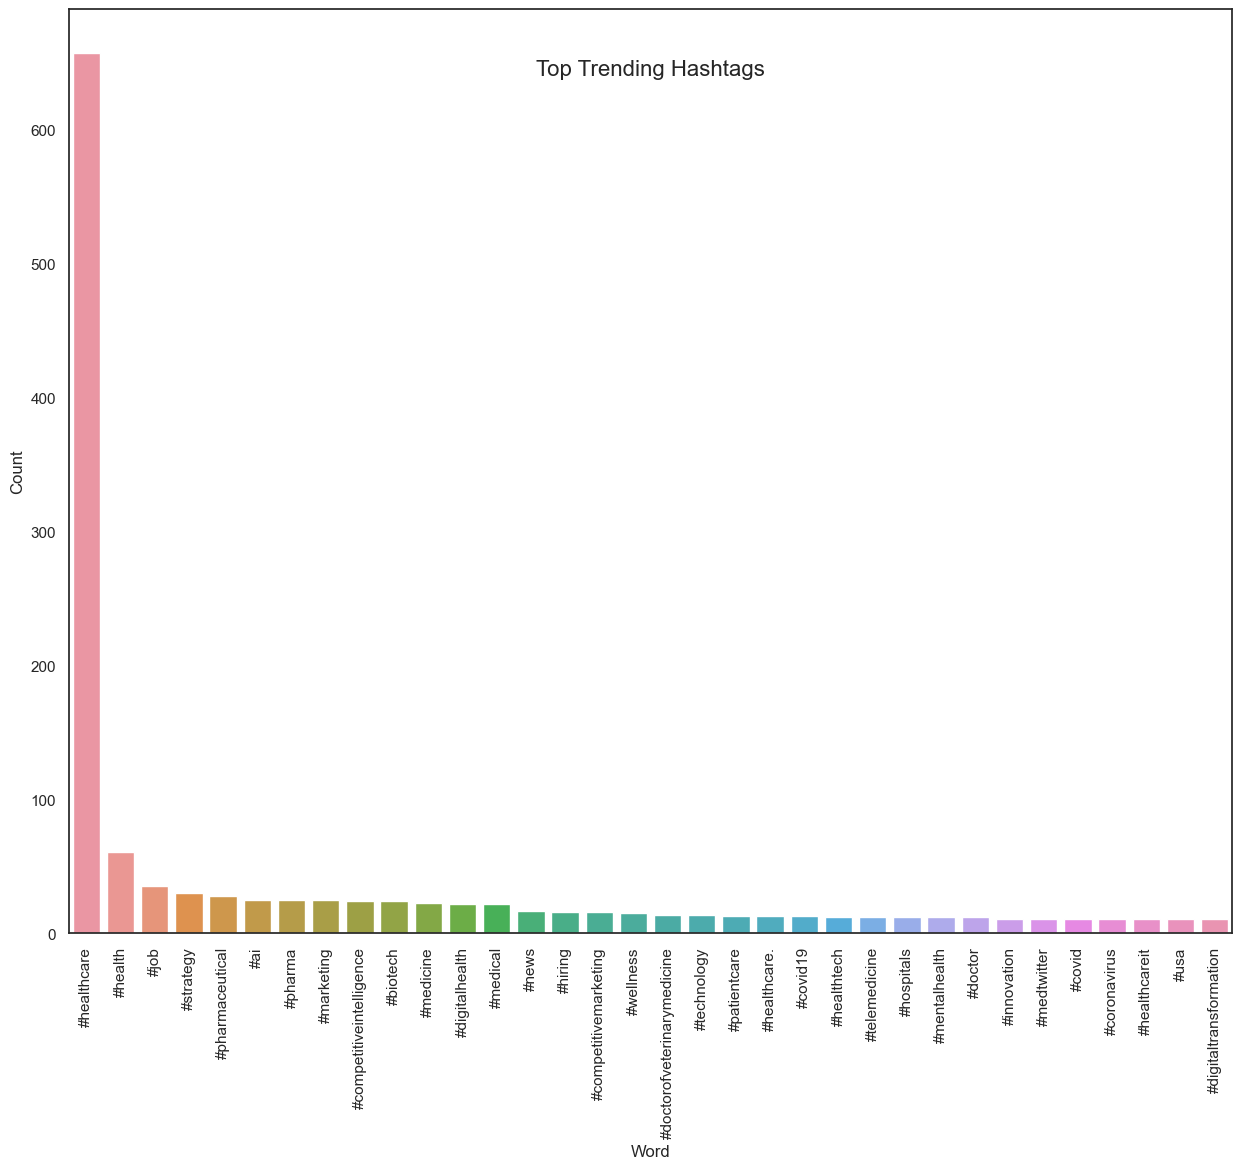

In [174]:
# Create a Seaborn barplot indicating records with a count >10 records.
fig, ax = plt.subplots()

sns.barplot(x='Word', y='Count', 
            data=top_trending_unique_hashtags).set_title("Twitter - Top Trending Hashtags", fontsize=16, y=0.92)

x_labels = top_trending_unique_hashtags['Word']

ax.set_xticklabels(x_labels, rotation=90)

plt.show()

# 

# Assignment activity 6

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import *

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Investigate the main concerns posted by the NHS. 

In [2]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the first five rows of the DataFrame.
ar.head(5)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [3]:
# Print the min date.
print(ar['appointment_month'].min())
ar.head()

2020-01


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [4]:
# Print the min date.
print(ar['appointment_month'].max())
ar.tail()

2022-06


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [5]:
# View the data type of the ar DateFrame.
print(ar.dtypes)

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [6]:
# Change the date format of ar['appointment_month'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the ar DataFrame and columns to determine the format of the dates.
print(ar.dtypes)

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object


In [7]:
# Filter the data set to only look at data from 2021-08 onwards.
ar = ar.loc[(ar['appointment_month'] >= '2021-08')]
                    
# View the filtered DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [8]:
# Create an aggregated data set to review the different features.
# Determine the total number of appointments per month.

ar_agg = pd.DataFrame(ar.groupby(['appointment_month','hcp_type', 'appointment_status','appointment_mode', 'time_between_book_and_appointment']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
ar_agg.sort_values(['total_monthly_appointments'],ascending=False)

# View the new aggregated DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,total_monthly_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [9]:
# Create a new DataFrame (e.g. ar_df) to determine the total number of appointments per month.
ar_df = pd.DataFrame(ar.groupby(['appointment_month']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
ar_df.sort_values(['total_monthly_appointments'],ascending=False)

# View the DataFrame.
ar_df


,appointment_month,total_monthly_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776
5,2022-01-01,25635474
6,2022-02-01,25355260
7,2022-03-01,29595038
8,2022-04-01,23913060
9,2022-05-01,27495508


In [10]:
# View the data type of the ar DateFrame.
print(ar_df.dtypes)


appointment_month             datetime64[ns]
total_monthly_appointments             int64
dtype: object


In [11]:
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_ut = ar_df['utilisation'] = ar_df['total_monthly_appointments']/30
ar_ut

0     7.950724e+05
1     9.507500e+05
2     1.010128e+06
3     1.013502e+06
4     8.380259e+05
5     8.545158e+05
6     8.451753e+05
7     9.865013e+05
8     7.971020e+05
9     9.165169e+05
10    8.609359e+05
Name: total_monthly_appointments, dtype: float64

In [12]:
# Rounding the utilisation column.
ar_ut = ar_df[['appointment_month', 'total_monthly_appointments', 'utilisation']].round()
ar_ut

,appointment_month,total_monthly_appointments,utilisation
0,2021-08-01,23852171,795072.0
1,2021-09-01,28522501,950750.0
2,2021-10-01,30303834,1010128.0
3,2021-11-01,30405070,1013502.0
4,2021-12-01,25140776,838026.0
5,2022-01-01,25635474,854516.0
6,2022-02-01,25355260,845175.0
7,2022-03-01,29595038,986501.0
8,2022-04-01,23913060,797102.0
9,2022-05-01,27495508,916517.0


#### Important to note! The NHS can accommodate a maximum of 1,200,000 appointments per day.

In [13]:
# View the data type of the ar DateFrame.
print(ar_df.dtypes)

# View the DataFrame.
ar_df


appointment_month             datetime64[ns]
total_monthly_appointments             int64
utilisation                          float64
dtype: object


,appointment_month,total_monthly_appointments,utilisation
0,2021-08-01,23852171,7.950724e+05
1,2021-09-01,28522501,9.507500e+05
2,2021-10-01,30303834,1.010128e+06
3,2021-11-01,30405070,1.013502e+06
4,2021-12-01,25140776,8.380259e+05
5,2022-01-01,25635474,8.545158e+05
6,2022-02-01,25355260,8.451753e+05
7,2022-03-01,29595038,9.865013e+05
8,2022-04-01,23913060,7.971020e+05
9,2022-05-01,27495508,9.165169e+05


In [14]:
# Convert the appointment_month to string data type for ease of visualisation.
from datetime import datetime

date_columns = ar_df.select_dtypes(include=['datetime64']).columns.tolist()
ar_df[date_columns] = ar_df[date_columns].astype(str)

In [15]:
# View the data type of the ar DateFrame.
print(ar_df.dtypes)

appointment_month              object
total_monthly_appointments      int64
utilisation                   float64
dtype: object


Text(0.5, 0.92, 'Total Appointments by Month')

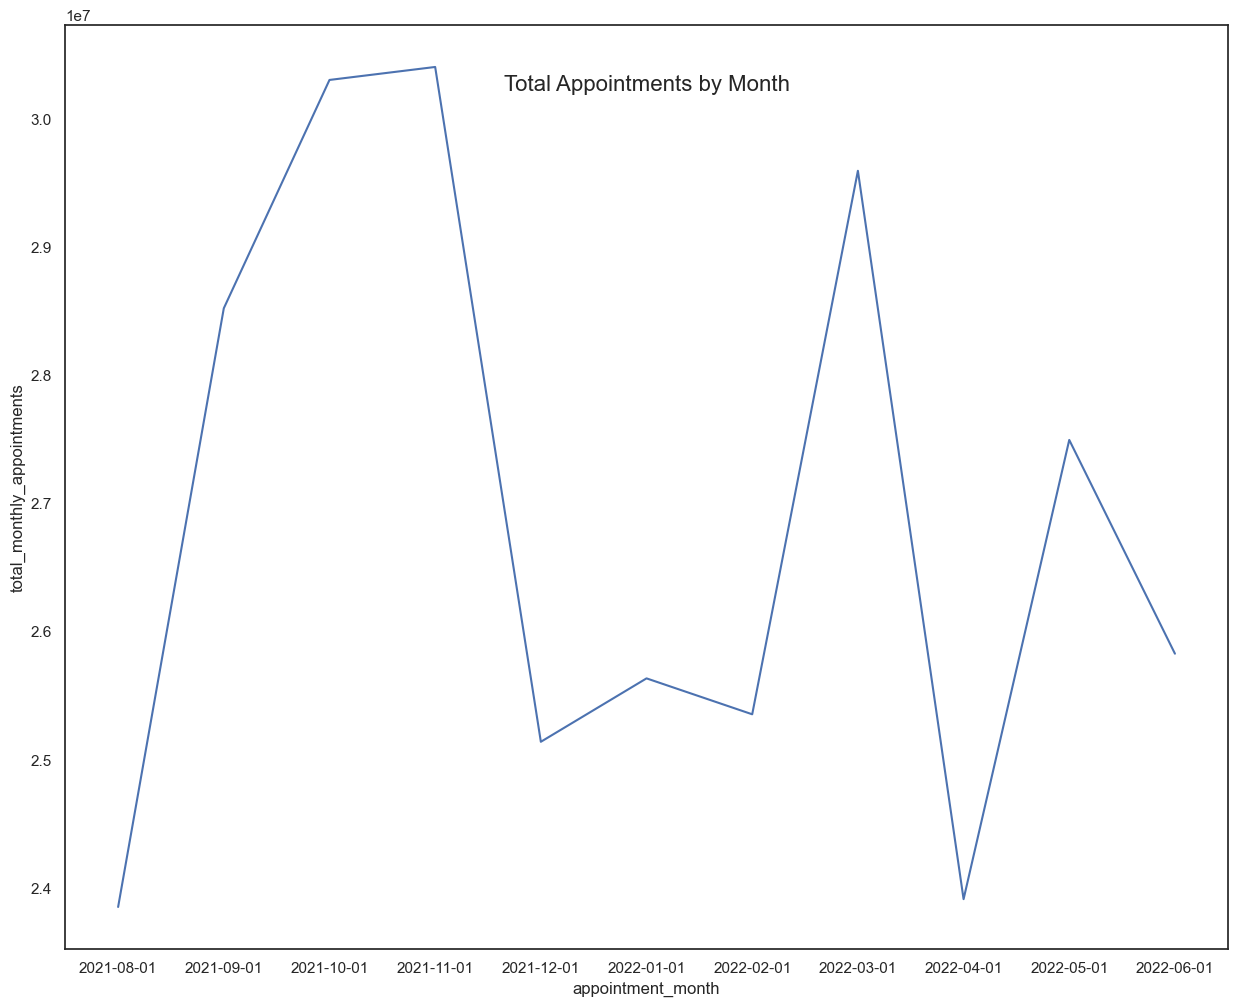

In [16]:
# Plot sum of count of monthly visits.
# Create a lineplot with Seaborn.

sns.lineplot(x='appointment_month', y='total_monthly_appointments', 
             data=ar_df).set_title("Total Appointments by Month", fontsize=16, y=0.92)

In [17]:
# View the DataFrame.
ar_ut

,appointment_month,total_monthly_appointments,utilisation
0,2021-08-01,23852171,795072.0
1,2021-09-01,28522501,950750.0
2,2021-10-01,30303834,1010128.0
3,2021-11-01,30405070,1013502.0
4,2021-12-01,25140776,838026.0
5,2022-01-01,25635474,854516.0
6,2022-02-01,25355260,845175.0
7,2022-03-01,29595038,986501.0
8,2022-04-01,23913060,797102.0
9,2022-05-01,27495508,916517.0


Text(0.5, 0.92, 'Monthly Capacity Utilisation')

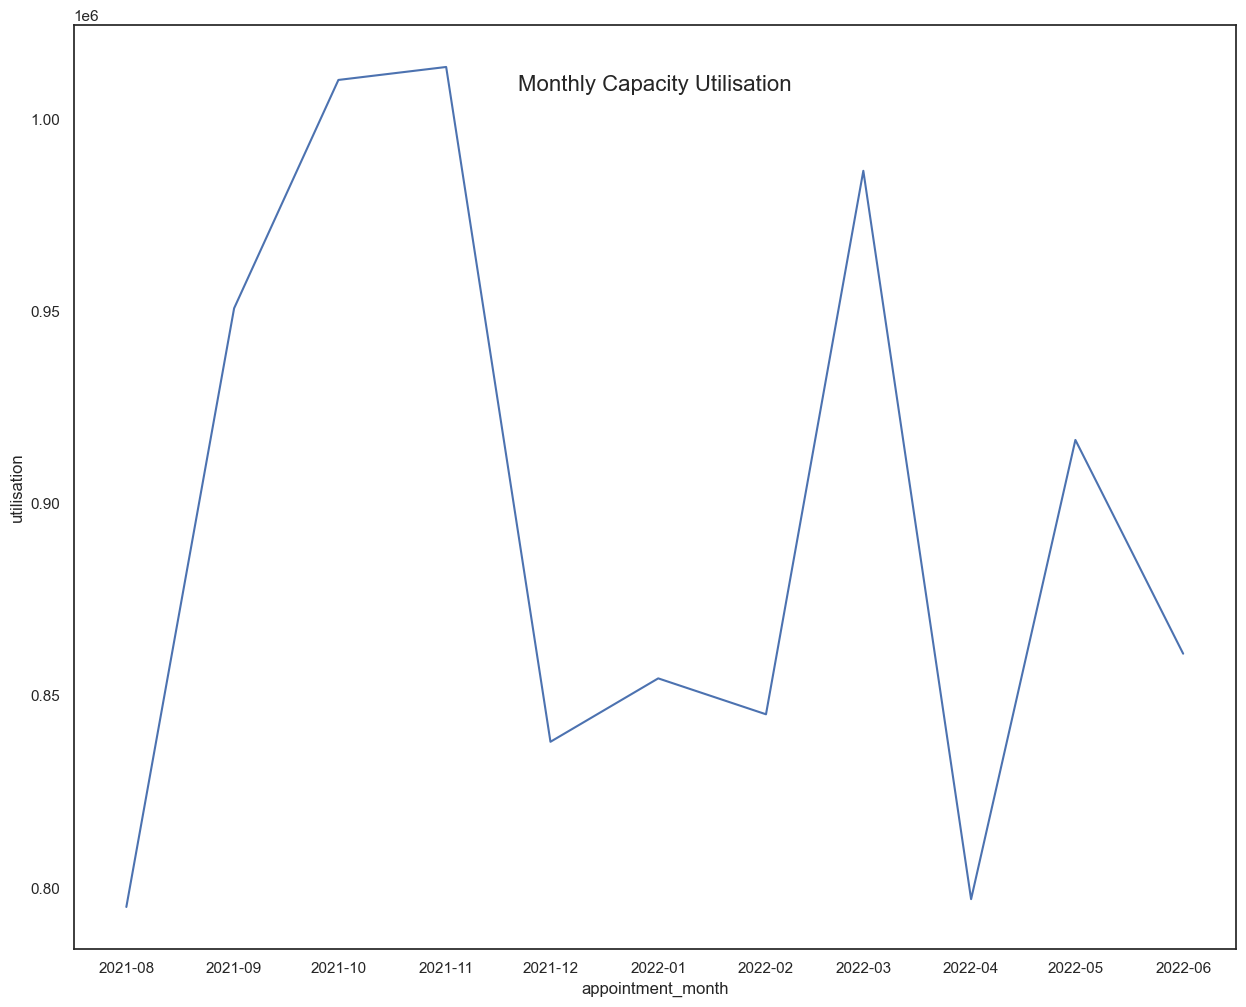

In [18]:
# Plot monthly capacity utilisation.

# Create a lineplot.
sns.lineplot(x='appointment_month', y='utilisation', 
             data=ar_ut).set_title("Monthly Capacity Utilisation", fontsize=16, y=0.92)

**Question 2:** How do the healthcare professional types differ over time?

In [19]:
# View the new aggregated DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,total_monthly_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [20]:
# View the data type of the ar DateFrame.
print(ar_agg.dtypes)

appointment_month                    datetime64[ns]
hcp_type                                     object
appointment_status                           object
appointment_mode                             object
time_between_book_and_appointment            object
total_monthly_appointments                    int64
dtype: object


In [21]:
# Convert the appointment_month to string data type for ease of visualisation.

date_columns = ar_agg.select_dtypes(include=['datetime64']).columns.tolist()
ar_agg[date_columns] = ar_agg[date_columns].astype(str)

In [22]:
# View the data type of the ar DateFrame.
print(ar_agg.dtypes)

appointment_month                    object
hcp_type                             object
appointment_status                   object
appointment_mode                     object
time_between_book_and_appointment    object
total_monthly_appointments            int64
dtype: object


Text(0.5, 1, 'Healthcare Professional Types Performance Over Time')

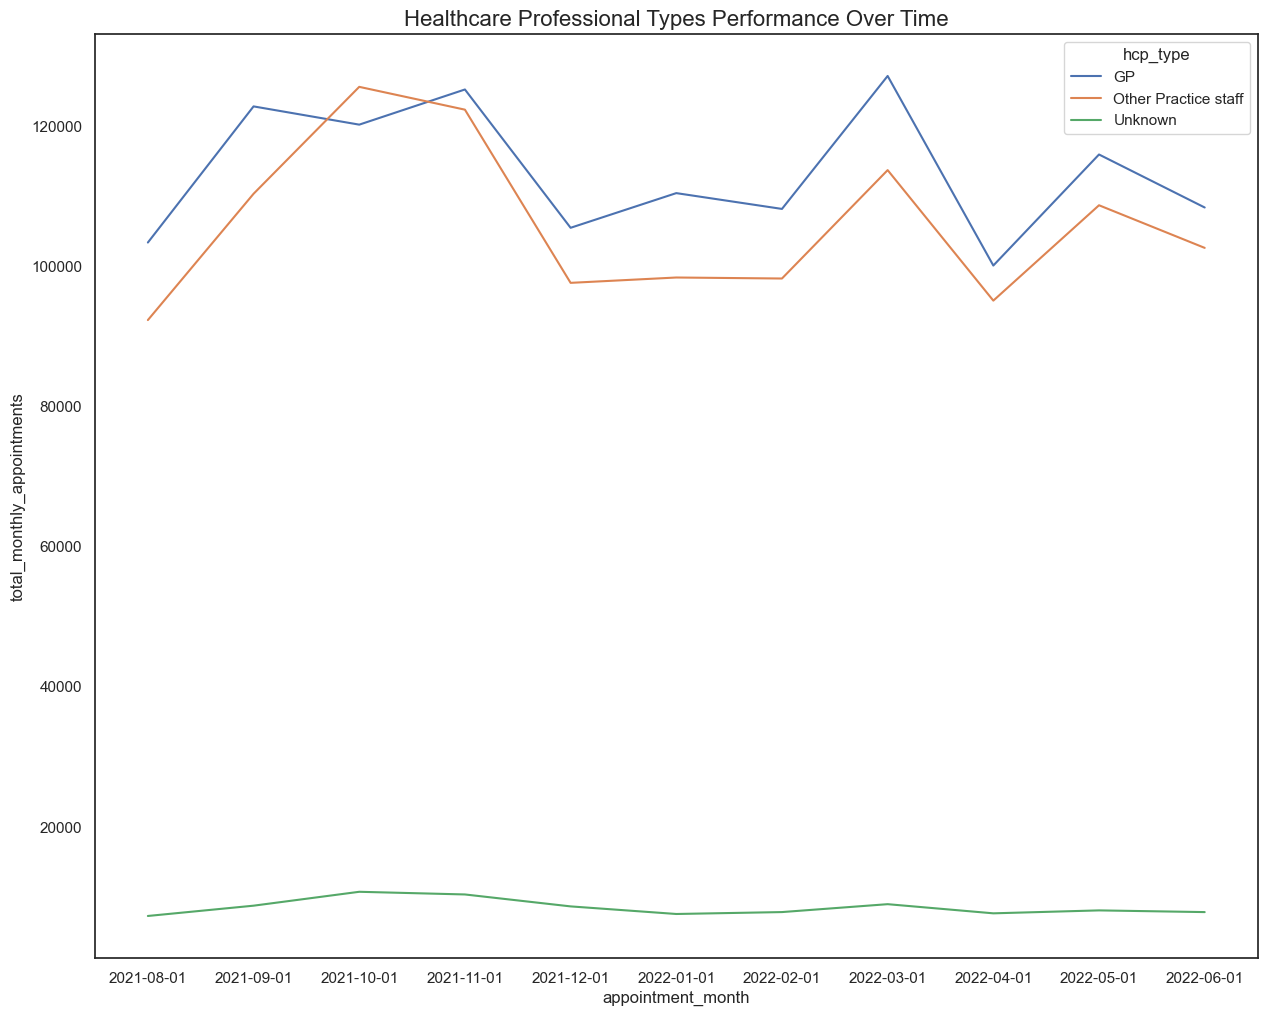

In [23]:
# Create a line plot to answer the question.

sns.lineplot(x='appointment_month', y='total_monthly_appointments', hue='hcp_type', errorbar=None,
             data=ar_agg).set_title("Healthcare Professional Types Performance Over Time", fontsize=16, y=1)

**Question 3:** Are there significant changes in whether or not visits are attended?

Text(0.5, 1, 'Appointments Status Over Time')

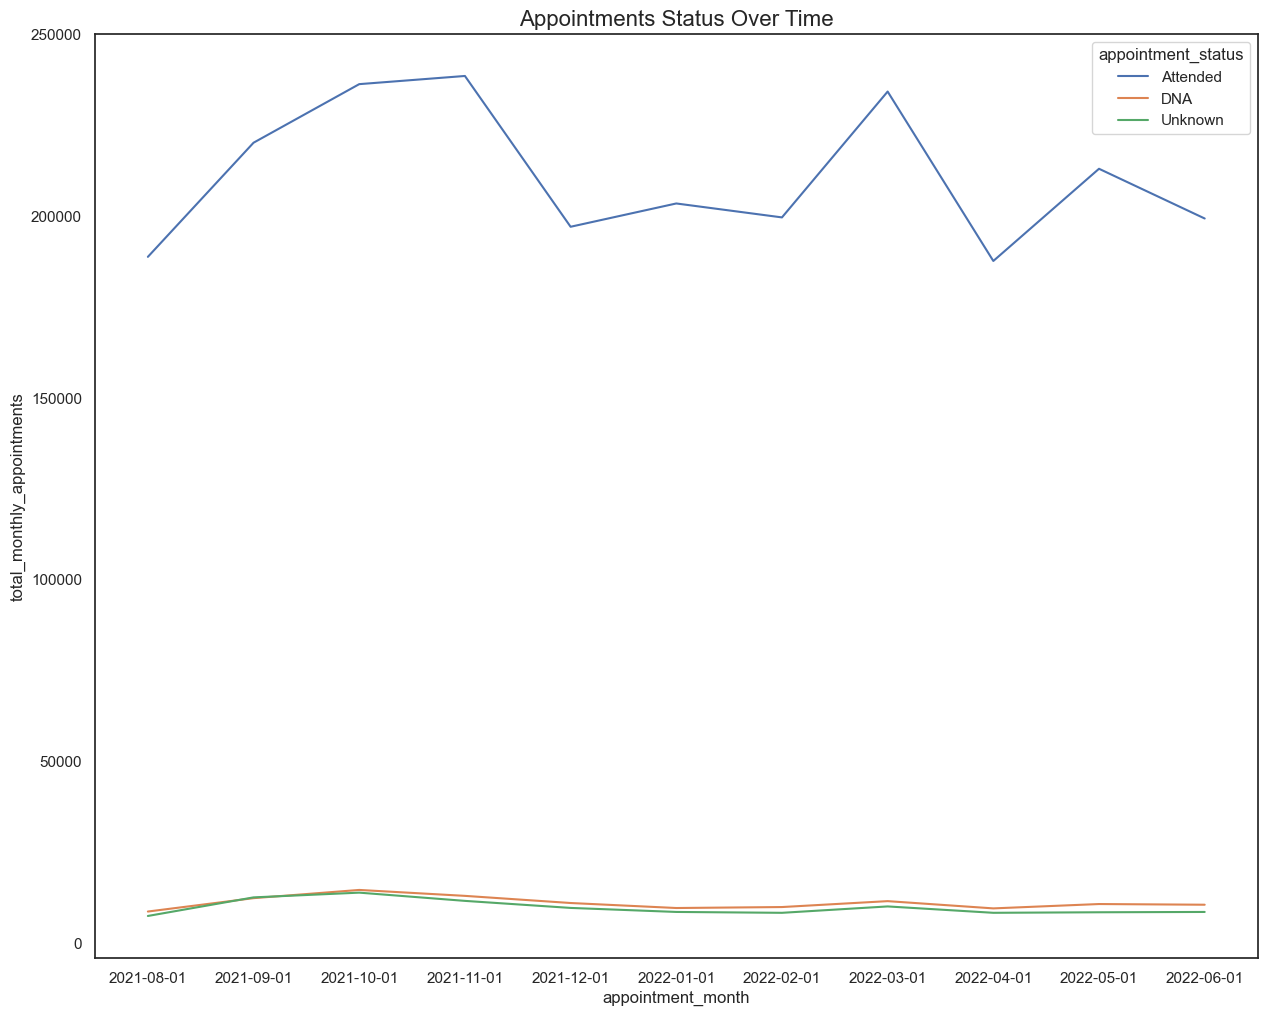

In [24]:
# Create a line plot to answer the question.
sns.lineplot(x='appointment_month', y='total_monthly_appointments', hue='appointment_status', errorbar=None,
             data=ar_agg).set_title("Appointments Status Over Time", fontsize=16, y=1)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

Text(0.5, 1, 'Monthly Appointments by Appointment Mode')

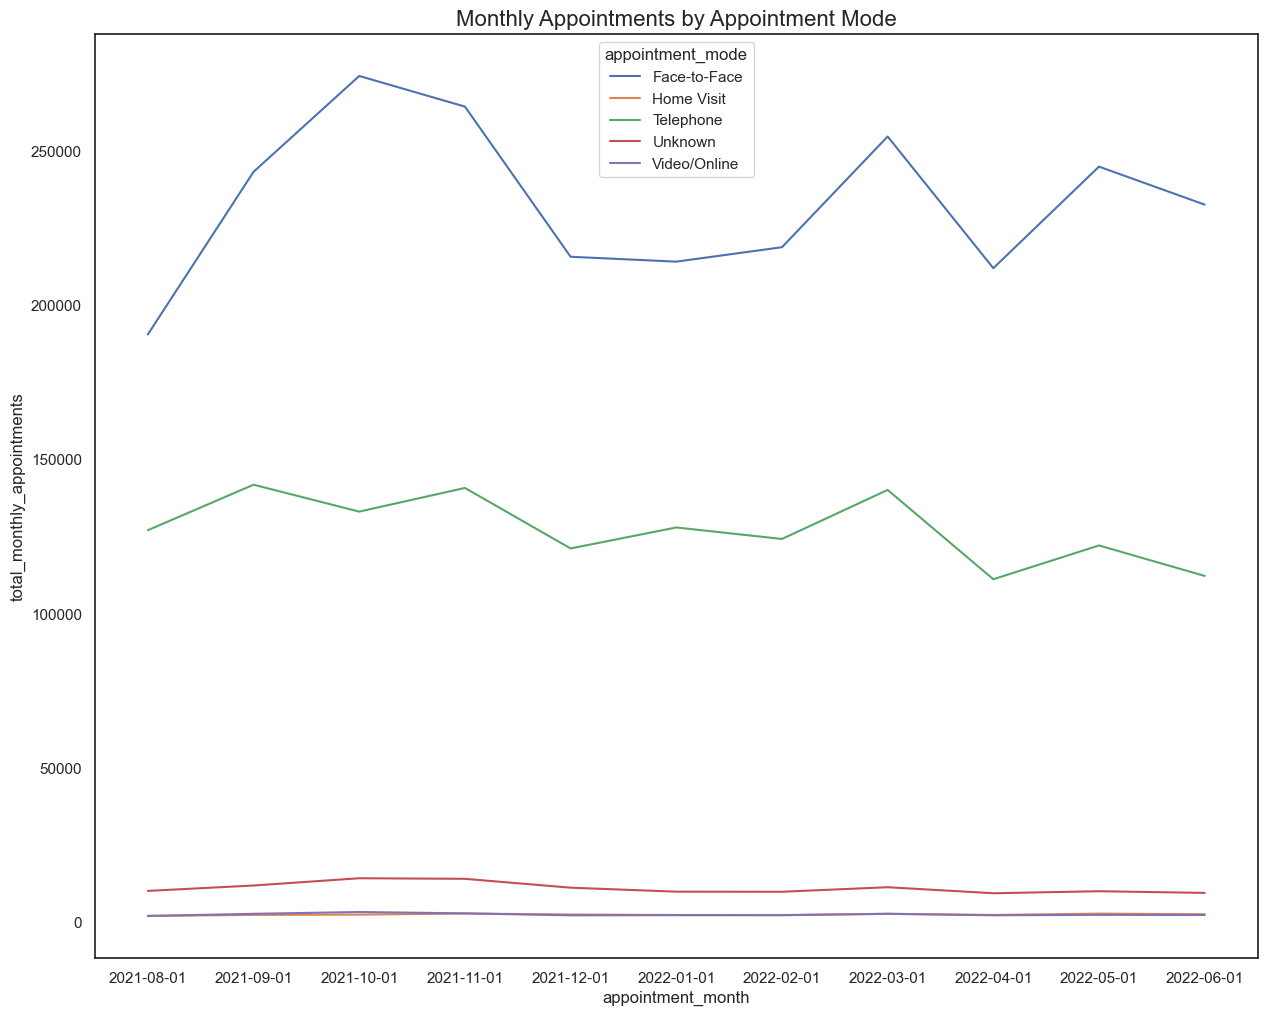

In [26]:
# Create a line plot to answer the question.
sns.lineplot(x='appointment_month', y='total_monthly_appointments', hue='appointment_mode', errorbar=None,
             data=ar_agg).set_title("Monthly Appointments by Appointment Mode", fontsize=16, y=1)

**Question 5:** Are there any trends in time between booking an appointment?

Text(0.5, 1, 'Monthly Appointments by Time Between Booking & Appointment')

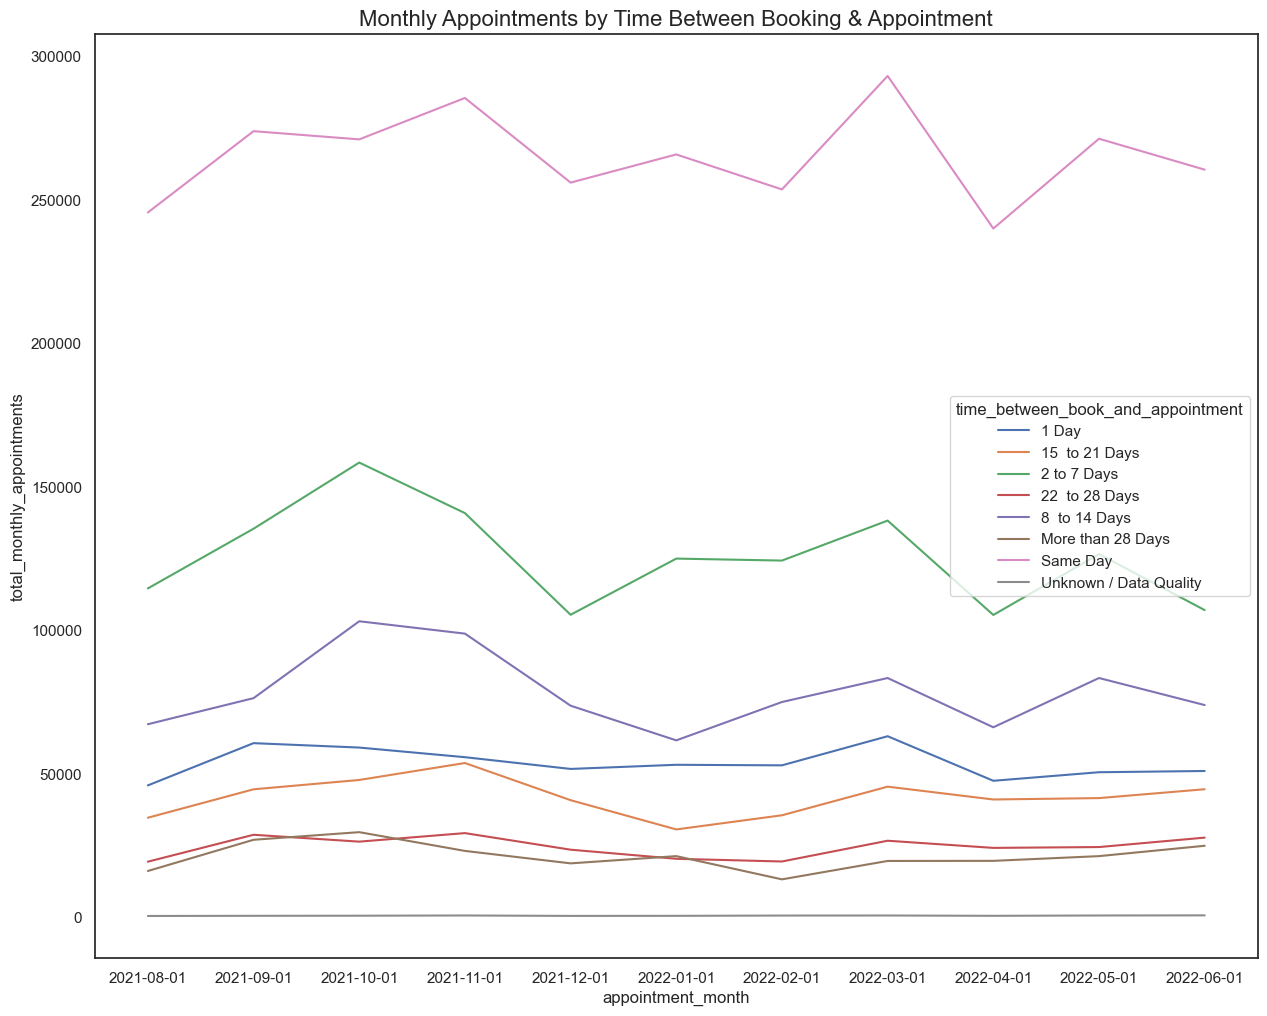

In [27]:
# Create a line plot to answer the question.
sns.lineplot(x='appointment_month', y='total_monthly_appointments', hue='time_between_book_and_appointment', errorbar=None,
             data=ar_agg).set_title("Monthly Appointments by Time Between Booking & Appointment", fontsize=16, y=1)

**Question 6:** How do the spread of service settings compare?

In [28]:
# Specify the name of the Excel file.
nc = pd.read_excel('national_categories.xlsx')

# Print the top 5 raws of the nc DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [30]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
# To determine the total number of appointments per month per service setting.
nc_ss = pd.DataFrame(nc.groupby(['appointment_month','service_setting']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc_ss.sort_values(['total_monthly_appointments'],ascending=False)

# View the DataFrame.
nc_ss.head()


,appointment_month,service_setting,total_monthly_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_8665/1624859078.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(nc_ss['appointment_month'], rotation=30, ha='right')


Text(0.5, 1, 'Monthly Appointments by Spread Of Service Settings Without GP')

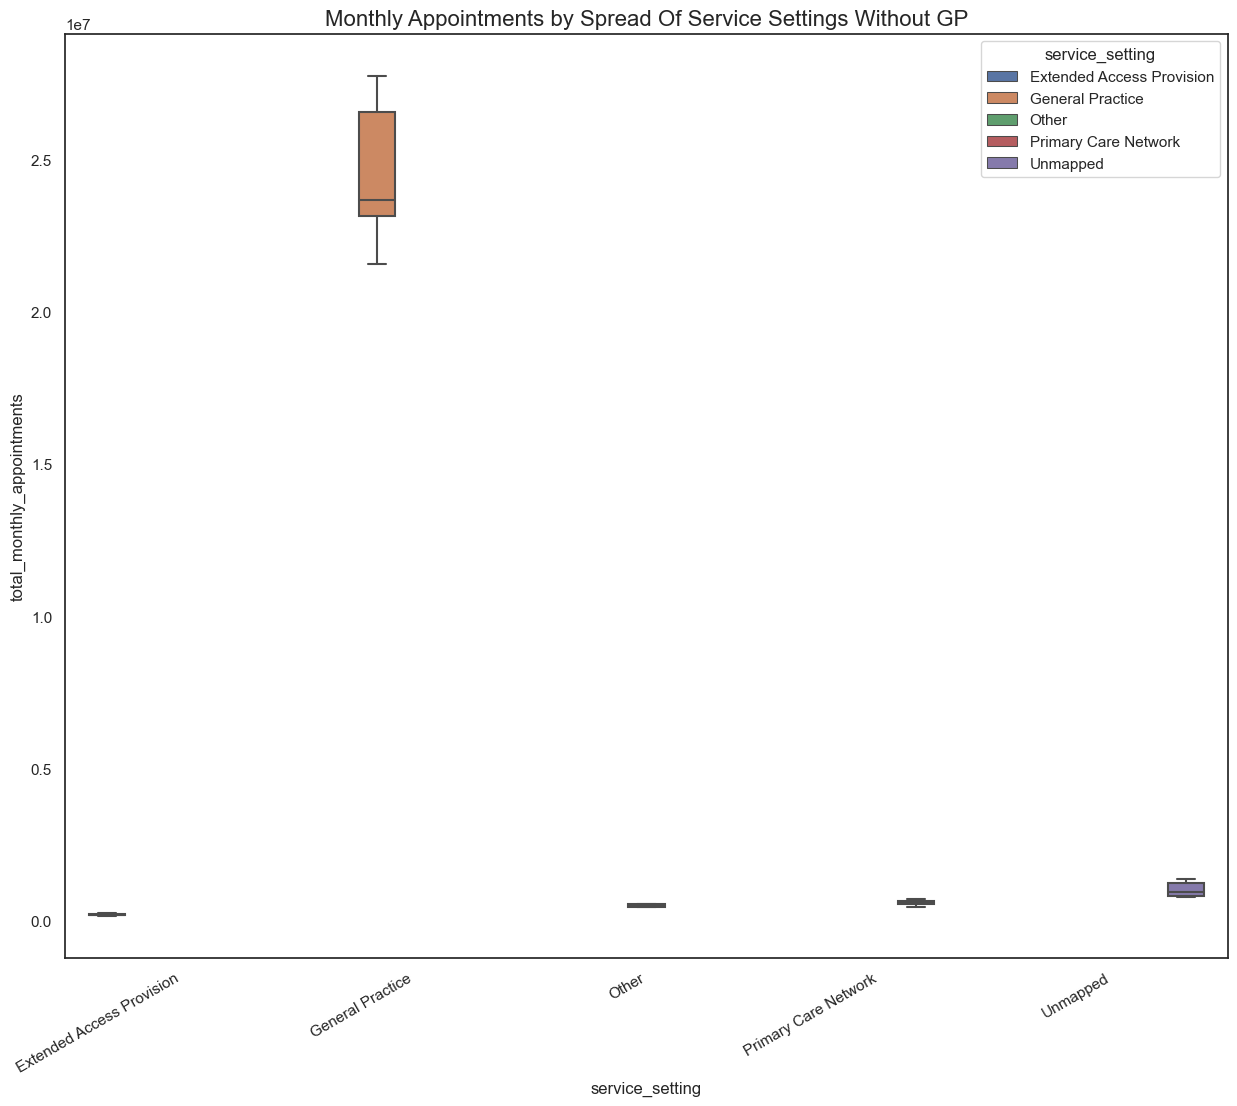

In [48]:
# Create a boxplot to investigate spread of service settings.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')
fig, ax = plt.subplots()
ax.set_xticklabels(nc_ss['appointment_month'], rotation=30, ha='right')

sns.boxplot(data=nc_ss, x='service_setting', 
            y='total_monthly_appointments', 
            hue='service_setting').set_title("Monthly Appointments by Spread Of Service Settings Without GP", fontsize=16, y=1)


In [49]:
# Create a boxplot to investigate the service settings without GP.
nc_ss_without_GP = nc_ss[nc_ss['service_setting'] != 'General Practice']
nc_ss_without_GP

,appointment_month,service_setting,total_monthly_appointments
0,2021-08,Extended Access Provision,160927
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115
10,2021-10,Extended Access Provision,209539
12,2021-10,Other,556487


/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_8665/521720723.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(nc_ss_without_GP['appointment_month'], rotation=30, ha='right')


Text(0.5, 1, 'Monthly Appointments by Spread Of Service Settings Without GP')

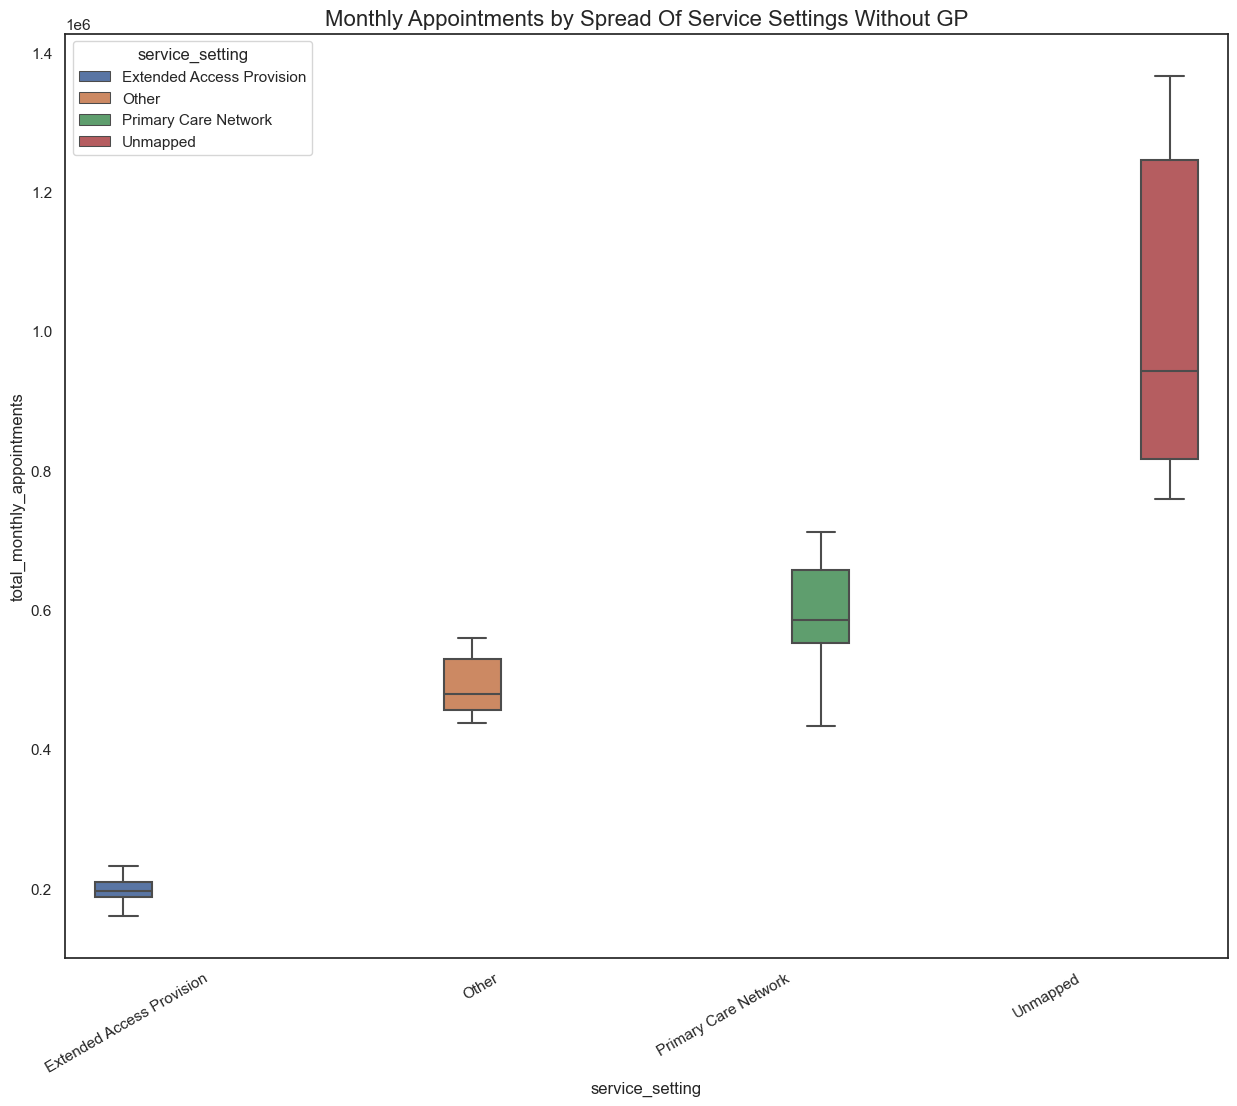

In [50]:
# Create a boxplot based on the order of variables.
fig, ax = plt.subplots()
ax.set_xticklabels(nc_ss_without_GP['appointment_month'], rotation=30, ha='right')

sns.boxplot(data=nc_ss_without_GP, x='service_setting', 
            y='total_monthly_appointments', hue='service_setting').set_title("Monthly Appointments by Spread Of Service Settings Without GP", fontsize=16, y=1)


# 